In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set file path
file_path = '../data/Mushroom_25-05-08_0326.lvm'

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File {file_path} does not exist")
else:
    # Read LVM file
    # LVM files are tab-separated text files without header
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Display basic information about the data
    print(f"Data shape: {data.shape}")
    print("\nFirst 5 rows of data:")
    print(data.head())
    
    # Based on file content, we need to name the columns
    # Assuming first column is timestamp, others are sensor data
    columns = ['Timestamp'] + [f'Sensor_{i}' for i in range(1, data.shape[1])]
    data.columns = columns
    
    print("\nData after renaming columns:")
    print(data.head())


Data shape: (1084420, 10)

First 5 rows of data:
               0         1         2         3         4         5         6  \
0  120386.537600 -0.017416 -0.015052 -0.035177 -0.024526 -0.022283 -0.014307   
1  120386.714606 -0.017413 -0.015028 -0.035177 -0.024510 -0.022269 -0.014292   
2  120386.889620 -0.017420 -0.015043 -0.035157 -0.024524 -0.022270 -0.014293   
3  120387.088626 -0.017404 -0.015036 -0.035172 -0.024527 -0.022294 -0.014290   
4  120387.273636 -0.017437 -0.015036 -0.035183 -0.024523 -0.022269 -0.014280   

          7         8   9  
0 -0.035494  0.001486 NaN  
1 -0.035491  0.001480 NaN  
2 -0.035494  0.001500 NaN  
3 -0.035498  0.001483 NaN  
4 -0.035490  0.001495 NaN  

Data after renaming columns:
       Timestamp  Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  \
0  120386.537600 -0.017416 -0.015052 -0.035177 -0.024526 -0.022283 -0.014307   
1  120386.714606 -0.017413 -0.015028 -0.035177 -0.024510 -0.022269 -0.014292   
2  120386.889620 -0.017420 -0.01

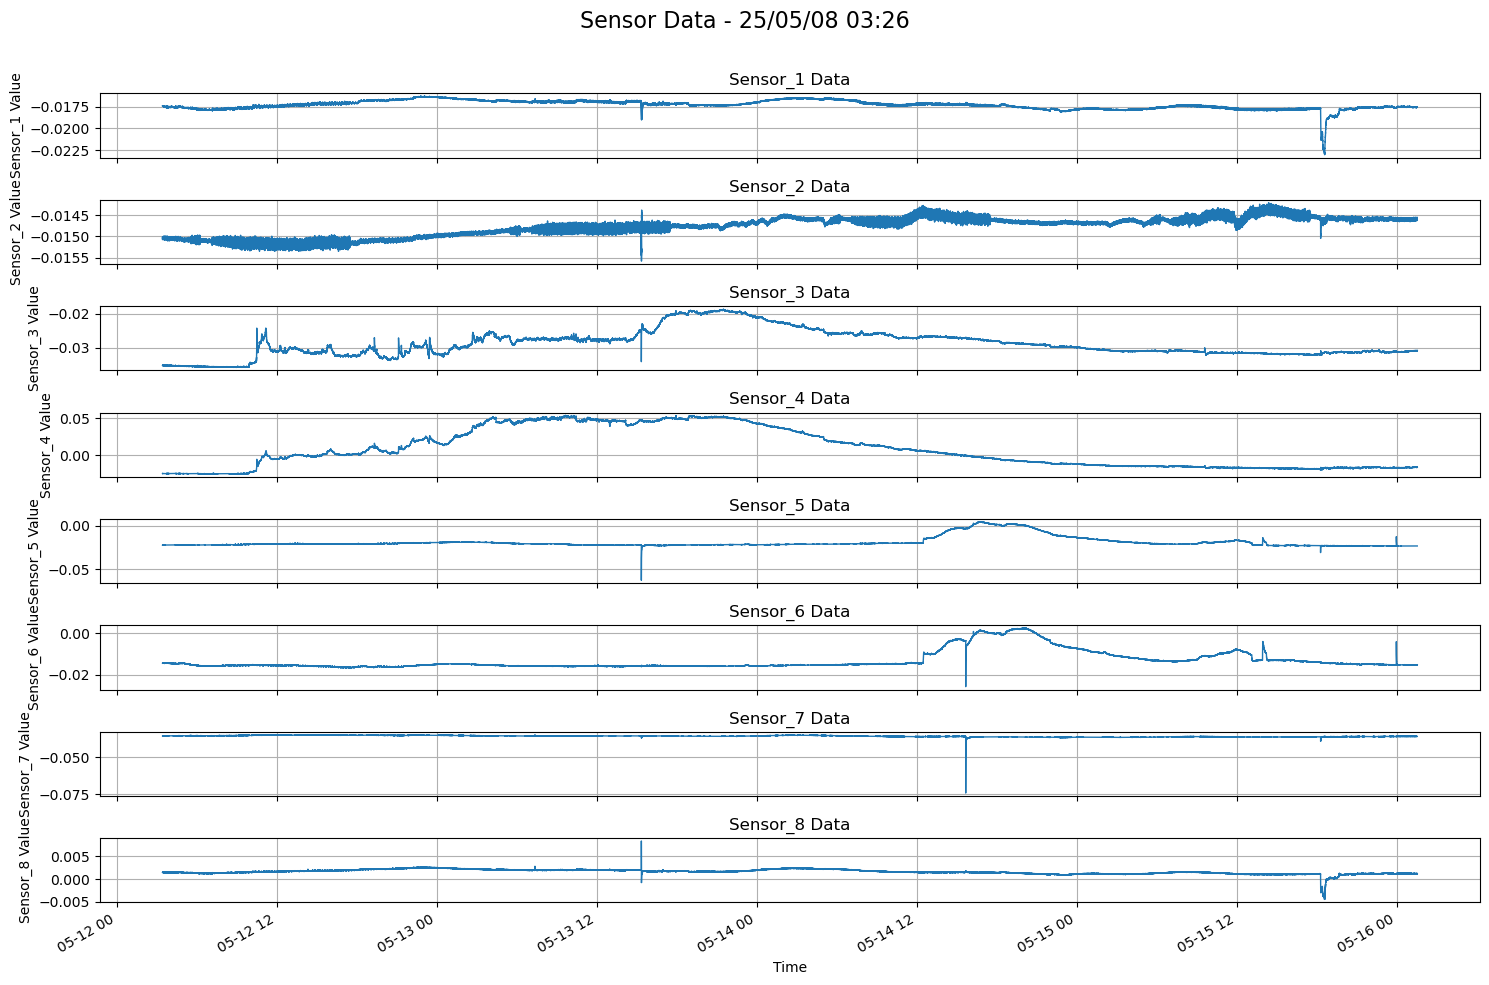

Sensor Statistics:

Sensor_1:
count    1.084420e+06
mean    -1.727884e-02
std      5.048720e-04
min     -2.300700e-02
25%     -1.762500e-02
50%     -1.728600e-02
75%     -1.690600e-02
max     -1.632500e-02
Name: Sensor_1, dtype: float64

Sensor_2:
count    1.084420e+06
mean    -1.481143e-02
std      2.283351e-04
min     -1.557400e-02
25%     -1.504800e-02
50%     -1.476700e-02
75%     -1.461900e-02
max     -1.421000e-02
Name: Sensor_2, dtype: float64

Sensor_3:
count    1.084420e+06
mean    -2.902471e-02
std      4.014688e-03
min     -3.576500e-02
25%     -3.148200e-02
50%     -2.978400e-02
75%     -2.700600e-02
max     -1.869200e-02
Name: Sensor_3, dtype: float64

Sensor_4:
count    1.084420e+06
mean     9.146397e-03
std      2.632990e-02
min     -2.506200e-02
25%     -1.520400e-02
50%      2.054000e-03
75%      3.857700e-02
max      5.387100e-02
Name: Sensor_4, dtype: float64

Sensor_5:
count    1.084420e+06
mean    -1.927404e-02
std      5.577440e-03
min     -6.273700e-02
25%     -2

In [22]:
# Extract date and time information from the filename
file_name = os.path.basename(file_path)  # Get the filename
date_time_str = file_name.split('_')[1:3]  # Extract date and time parts
date_str = date_time_str[0].replace('-', '/')  # Format date
time_str = date_time_str[1].replace('.lvm', '')  # Format time
# Parse time string, first two digits are hours, last two are minutes
hour = time_str[:2]
minute = time_str[2:]
formatted_time = f"{hour}:{minute}"

# Use actual timestamps and convert to specific times
actual_time = data['Timestamp']
# Calculate seconds relative to start time
start_time = actual_time.iloc[0]
relative_seconds = actual_time - start_time

# Create specific time labels
from datetime import datetime, timedelta
# Assume data recording started at the date and time specified in the filename
base_time = datetime(2025, 5, 12, int(hour), int(minute))  # Date and time parsed from filename
time_labels = [base_time + timedelta(seconds=s) for s in relative_seconds]

# Determine the number of sensors in the dataset
num_sensors = len([col for col in data.columns if 'Sensor_' in col]) - 1

# Create a figure with subplots for all sensors
plt.figure(figsize=(15, 10))

# Plot data for all sensors
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    plt.subplot(num_sensors, 1, i)
    plt.plot(time_labels, data[sensor_name], linewidth=1)
    plt.title(f'{sensor_name} Data')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    
    # Only add x-label for the bottom subplot
    if i == num_sensors:
        plt.xlabel('Time')
    
    plt.gcf().autofmt_xdate()  # Automatically format x-axis date labels

# Add a main title for the entire figure
plt.suptitle(f'Sensor Data - {date_str} {formatted_time}', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the suptitle

# Display the figure
plt.show()

# Print basic statistics for all sensors
print("Sensor Statistics:")
for i in range(1, num_sensors):
    sensor_name = f'Sensor_{i}'
    print(f"\n{sensor_name}:\n{data[sensor_name].describe()}")


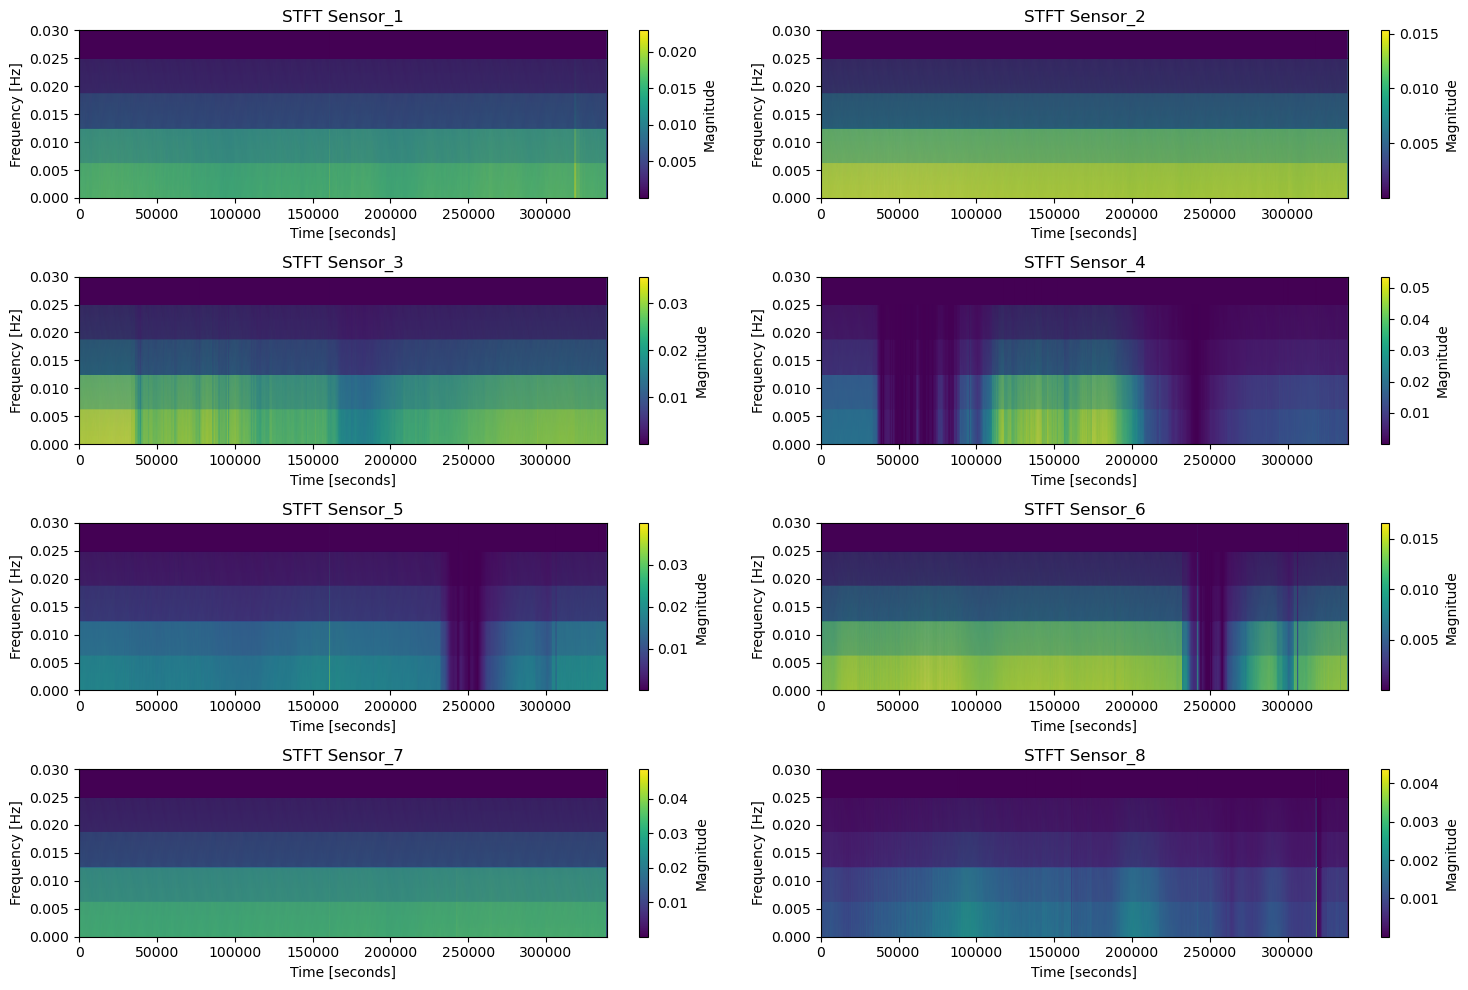

STFT analysis completed
Sampling rate: 3.20 Hz
Frequency resolution: 0.0125 Hz
Time resolution: 39.9933 seconds


In [23]:
# Perform Short-Time Fourier Transform (STFT) analysis
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for STFT analysis
plt.figure(figsize=(15, 10))

# Perform STFT on all sensor data
for i in range(1, 9):  # Assuming 8 sensors
    sensor_name = f'Sensor_{i}'
    
    # Get sensor data
    sensor_data = data[sensor_name].values
    
    # Calculate sampling rate (based on timestamp differences)
    sampling_rate = 1.0 / np.mean(np.diff(data['Timestamp']))
    
    # Perform STFT
    f, t, Zxx = signal.stft(sensor_data, fs=sampling_rate, nperseg=256)
    
    # Plot STFT results
    plt.subplot(4, 2, i)
    
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    plt.title(f'STFT {sensor_name}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seconds]')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)  # Limit y-axis to 0.03Hz

plt.tight_layout()
plt.show()

# Print basic information about the STFT analysis
print(f"STFT analysis completed")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Frequency resolution: {f[1]-f[0]:.4f} Hz")
print(f"Time resolution: {t[1]-t[0]:.4f} seconds")


In [24]:
# Calculate the recording end time based on the timestamp
import datetime
# Extract start time from the filename (Mushroom_25-05-08_0326)
filename = file_path.split('/')[-1]
date_part = filename.split('_')[1]  # '25-05-08'
time_part = filename.split('_')[2]  # '0326'

# Handle potential file extension in time_part
if '.' in time_part:
    time_part = time_part.split('.')[0]  # Remove file extension if present

year = 2000 + int(date_part.split('-')[0])  # '25' -> 2025
month = int(date_part.split('-')[1])  # '05' -> 5
day = int(date_part.split('-')[2])  # '08' -> 8
hour = int(time_part[:2])  # '03' -> 3
minute = int(time_part[2:])  # '26' -> 26

start_time = datetime.datetime(year, month, day, hour, minute)

# Get the first and last timestamp
first_timestamp = data['Timestamp'].iloc[0]
last_timestamp = data['Timestamp'].iloc[-1]

# Calculate the duration in seconds
duration_seconds = last_timestamp - first_timestamp

# Calculate the end time
end_time = start_time + datetime.timedelta(seconds=duration_seconds)

# Format and print the results
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Recording end time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total recording duration: {duration_seconds:.2f} seconds ({duration_seconds/60:.2f} minutes)")


Recording start time: 2025-05-08 03:26:00
Recording end time: 2025-05-12 01:33:04
Total recording duration: 338824.48 seconds (5647.07 minutes)


In [25]:
# Function to find the closest timestamp in the data to a given event time
import pytz
import datetime

# Parse the event time string
event_time_str = "2025-05-08T03:26:00.000Z"
event_time = datetime.datetime.strptime(event_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
event_time = event_time.replace(tzinfo=pytz.UTC)  # Make it timezone-aware

# Make start_time timezone-aware as well
start_time = start_time.replace(tzinfo=pytz.UTC)

# Calculate seconds elapsed since recording start
elapsed_seconds = (event_time - start_time).total_seconds()

print(f"Event time: {event_time_str}")
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S %Z')}")
print(f"Seconds elapsed since recording start: {elapsed_seconds:.2f} seconds")

# Get the first timestamp from the data
first_timestamp = data['Timestamp'].iloc[0]

# Calculate the target timestamp by adding elapsed seconds to the first timestamp
target_timestamp = first_timestamp + elapsed_seconds

# Find the closest timestamp in the data
closest_idx = (data['Timestamp'] - target_timestamp).abs().idxmin()
closest_timestamp = data['Timestamp'].iloc[closest_idx]
closest_time_diff = abs(closest_timestamp - target_timestamp)

print(f"First data timestamp: {first_timestamp:.2f} seconds")
print(f"Target timestamp: {target_timestamp:.2f} seconds")
print(f"Closest data timestamp: {closest_timestamp:.2f} seconds")
print(f"Difference from target: {closest_time_diff:.2f} seconds")

# Extract the data at the closest timestamp
event_data = data.iloc[closest_idx]
print("\nSensor readings at event time:")
for column in data.columns:
    if column != 'Timestamp':
        print(f"{column}: {event_data[column]}")


Event time: 2025-05-08T03:26:00.000Z
Recording start time: 2025-05-08 03:26:00 UTC
Seconds elapsed since recording start: 0.00 seconds
First data timestamp: 120386.54 seconds
Target timestamp: 120386.54 seconds
Closest data timestamp: 120386.54 seconds
Difference from target: 0.00 seconds

Sensor readings at event time:
Sensor_1: -0.017416
Sensor_2: -0.015052
Sensor_3: -0.035177
Sensor_4: -0.024526
Sensor_5: -0.022283
Sensor_6: -0.014307
Sensor_7: -0.035494
Sensor_8: 0.001486
Sensor_9: nan


posx and posy should be finite values
posx and posy should be finite values


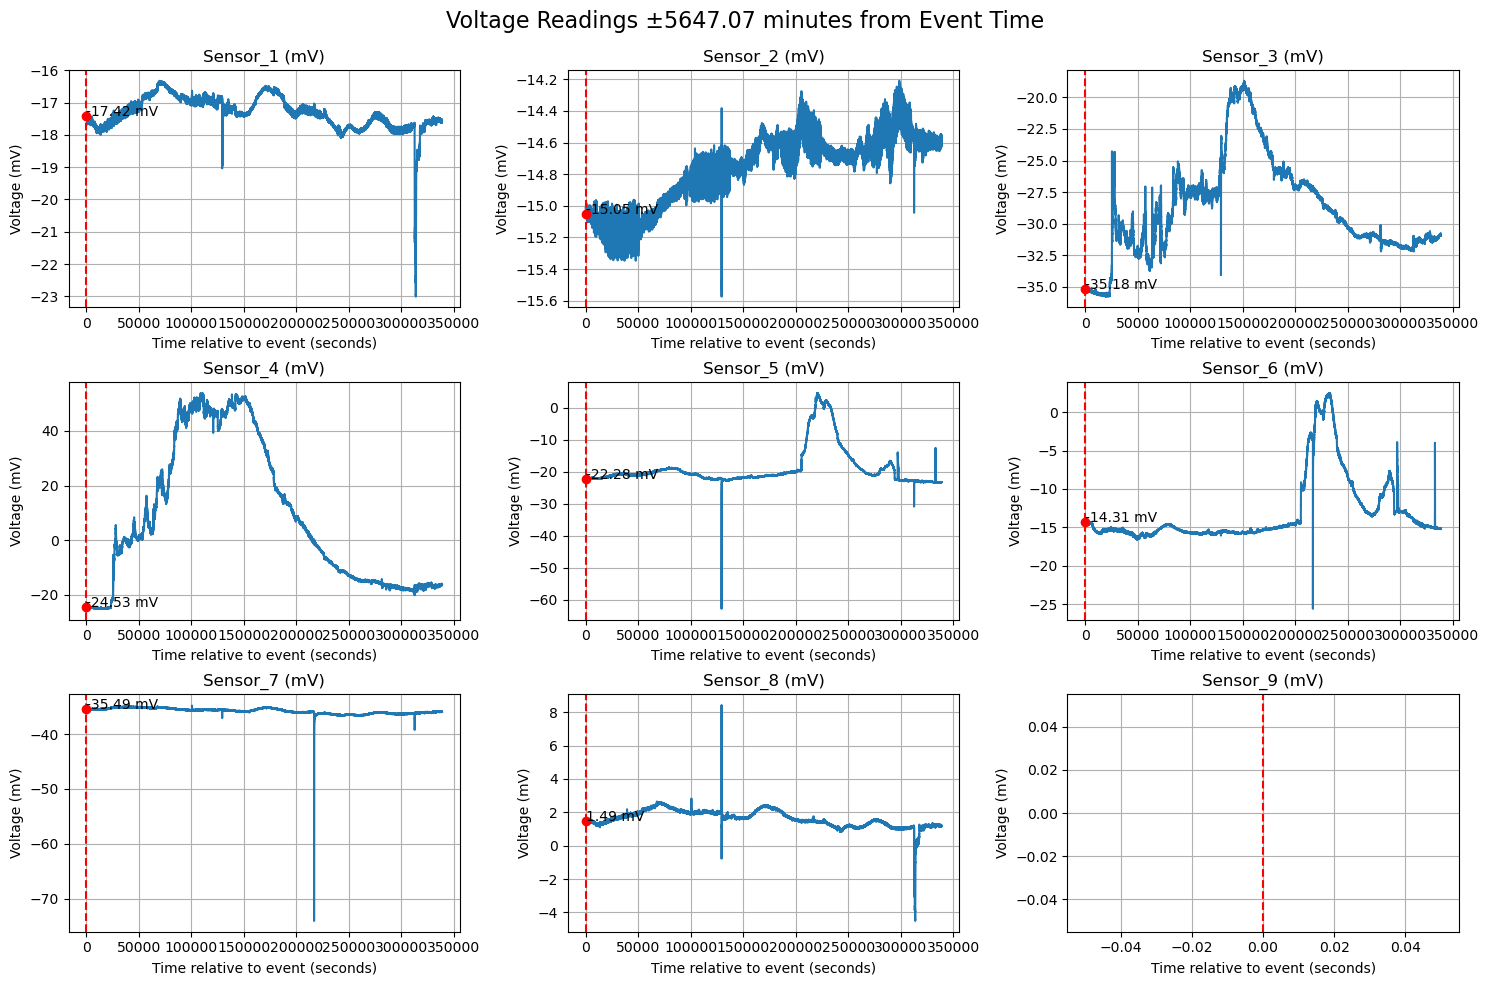

In [26]:
# Plot voltage data for 10 minutes before and after the event time
import matplotlib.pyplot as plt
import numpy as np

# Define the time window (10 minutes before and after the event)
window_minutes = 5647.07
window_seconds = window_minutes * 60  # Convert minutes to seconds
event_idx = closest_idx
start_idx = max(0, event_idx - int(window_seconds * data['Timestamp'].diff().median() ** -1))
end_idx = min(len(data) - 1, event_idx + int(window_seconds * data['Timestamp'].diff().median() ** -1))

# Extract the data for the time window
# window_data = data.iloc[start_idx:end_idx+1]
window_data = data.iloc[0:end_idx+1]

# Calculate time relative to the event (in seconds)
relative_time = window_data['Timestamp'] - closest_timestamp

# Create a figure with subplots for each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Convert voltage to millivolts
    voltage_mv = window_data[column] * 1000  # Convert to mV
    
    plt.plot(relative_time, voltage_mv)
    plt.axvline(x=0, color='r', linestyle='--', label='Event time')
    plt.title(f'{column} (mV)')
    plt.xlabel('Time relative to event (seconds)')
    plt.ylabel('Voltage (mV)')
    plt.grid(True)
    
    # Add a red dot at the event time point
    event_value_mv = event_data[column] * 1000  # Convert to mV
    plt.plot(0, event_value_mv, 'ro', markersize=6)  # Red dot at event time
    plt.text(1, event_value_mv, f'{event_value_mv:.2f} mV')  # Text label without arrow

plt.tight_layout()
plt.suptitle(f'Voltage Readings ±{window_minutes} minutes from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


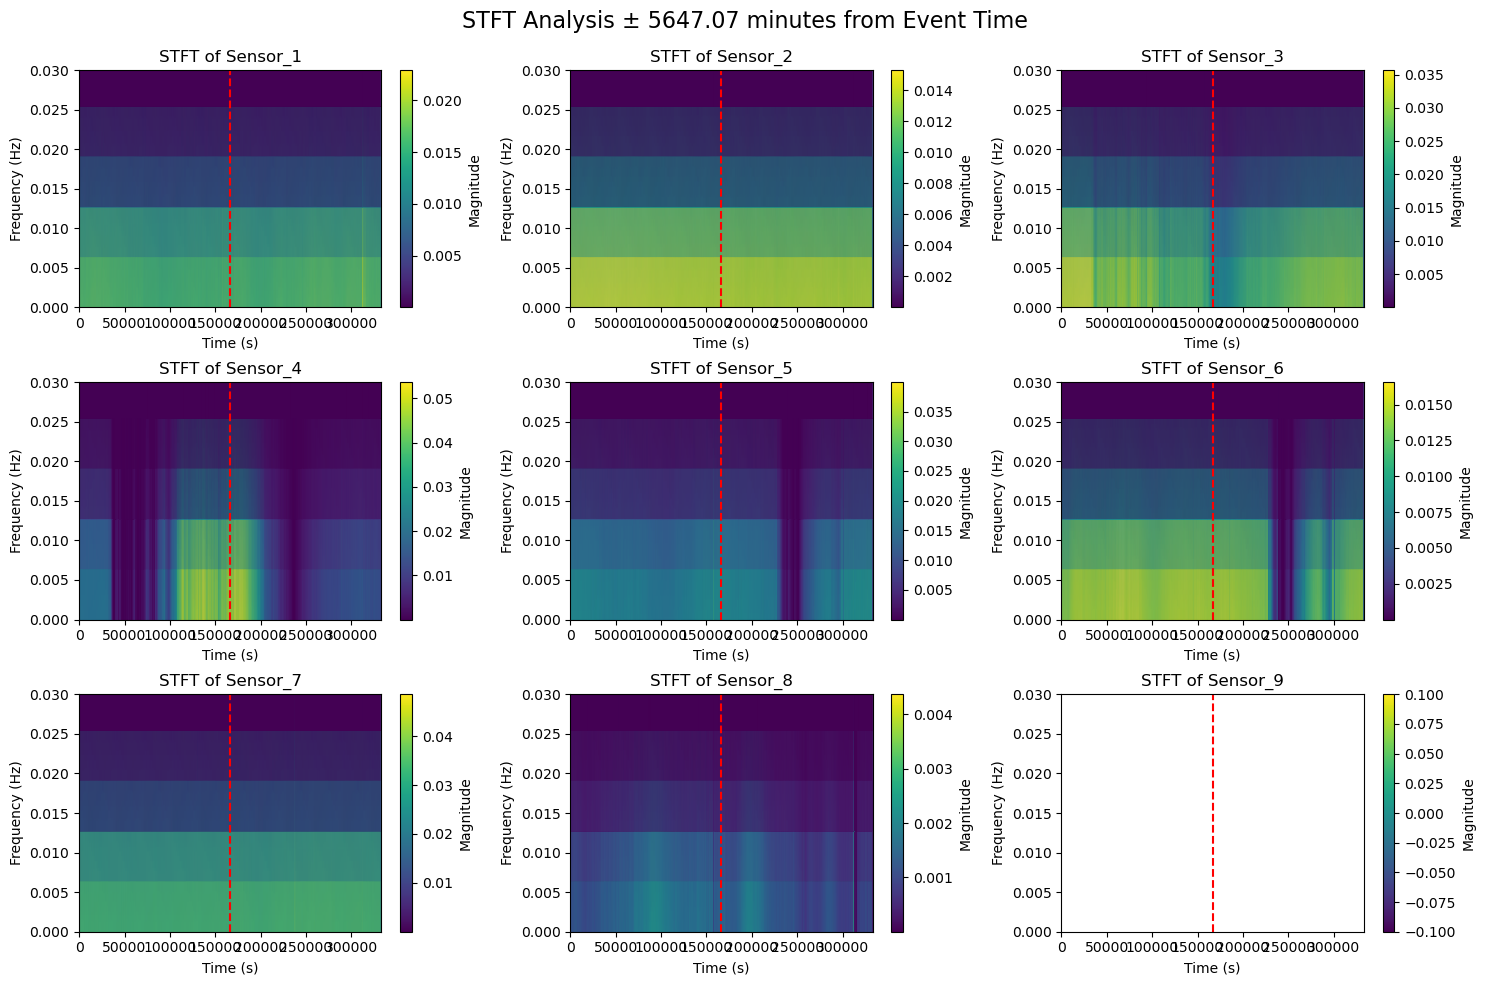

In [27]:
# Perform Short-Time Fourier Transform (STFT) analysis for each voltage channel
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Create a figure with subplots for STFT of each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Get voltage data for this channel
    voltage_data = window_data[column].values
    
    # Perform STFT
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Plot the STFT magnitude (in dB)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    # Mark the event time
    plt.axvline(x=t[len(t)//2], color='r', linestyle='--', label='Event time')
    
    plt.title(f'STFT of {column}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)
    
plt.tight_layout()
plt.suptitle(f'STFT Analysis ± {window_minutes} minutes from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()



=== Analysis for Sensor_1 ===
Analyzing frequency: 0.0254 Hz (closest to 0.02 Hz)
Average magnitude before event: 0.0000
Average magnitude after event: 0.0000
Change: -0.0000 (-6.52%)


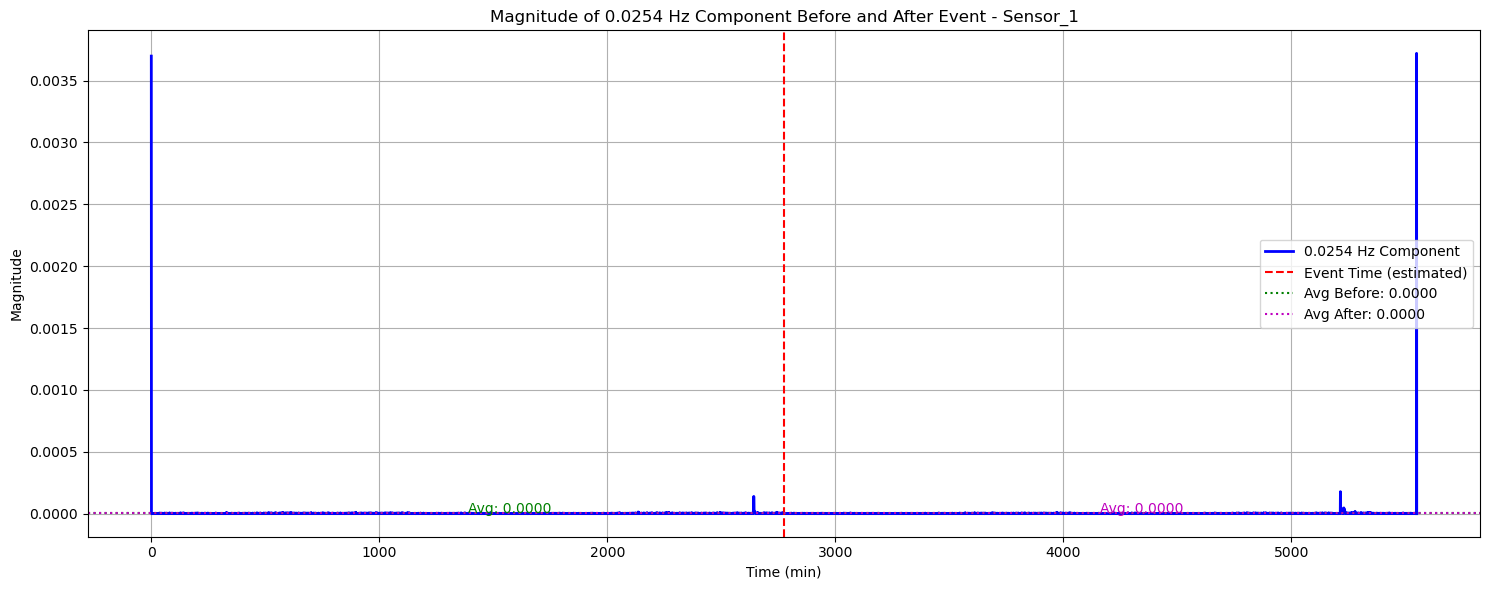


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: 0.0000 (1.33%)


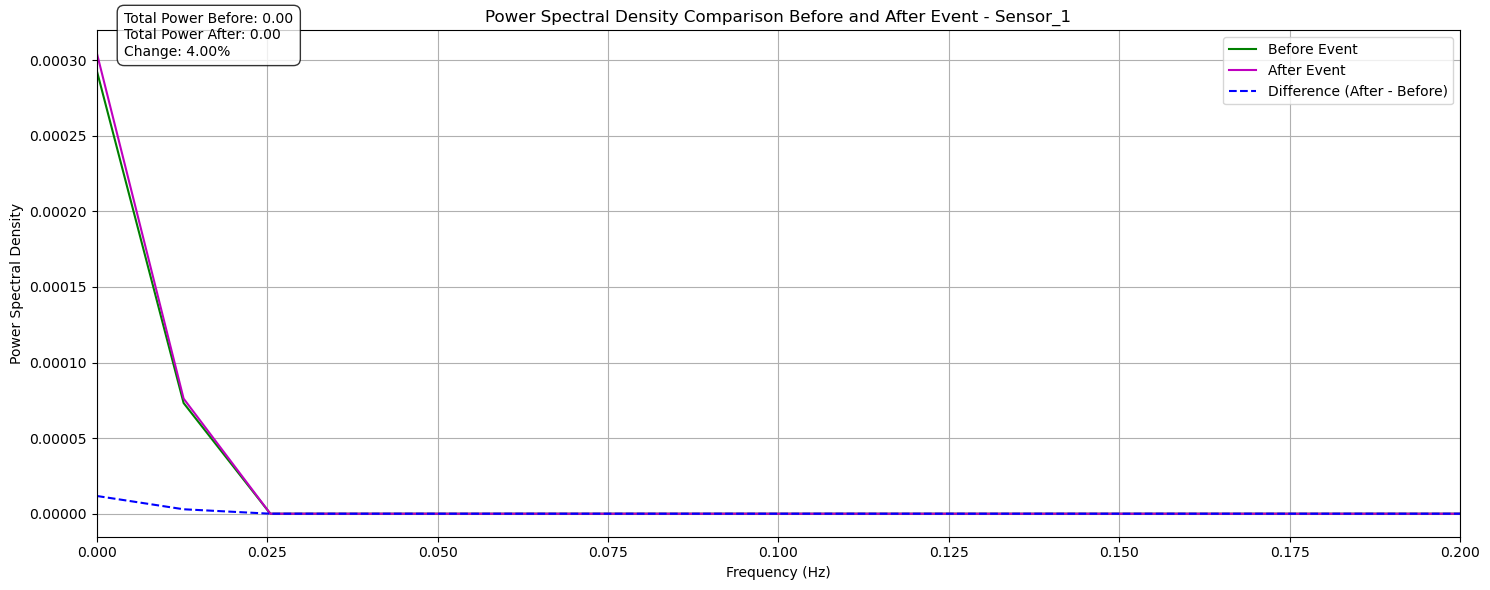


Power Spectral Density Analysis:
Total power before event: 0.0004
Total power after event: 0.0004
Absolute power change: 0.0000
Relative power change: 4.00%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_1_significant_changes.csv

Top 5 frequencies with largest power increase:
   Frequency        Before         After  Absolute_Change  Percent_Change
1   0.012722  7.322278e-05  7.615528e-05     2.932503e-06        4.004899
0   0.000000  2.928625e-04  3.045892e-04     1.172670e-05        4.004164
3   0.038165  8.110351e-10  8.251043e-10     1.406922e-11        1.544311
2   0.025444  3.241105e-09  3.284985e-09     4.387939e-11        1.313320
5   0.063609  2.939390e-10  2.979967e-10     4.057685e-12        1.030029

Top 5 frequencies with largest power decrease:
     Frequency        Before         After  Absolute_Change  Percent_Change
124   1.577507  4.240380e-12  3.215784e-12    -1.024596e-12       -0.982917
100   1.272183  4.378572e-12  3.366

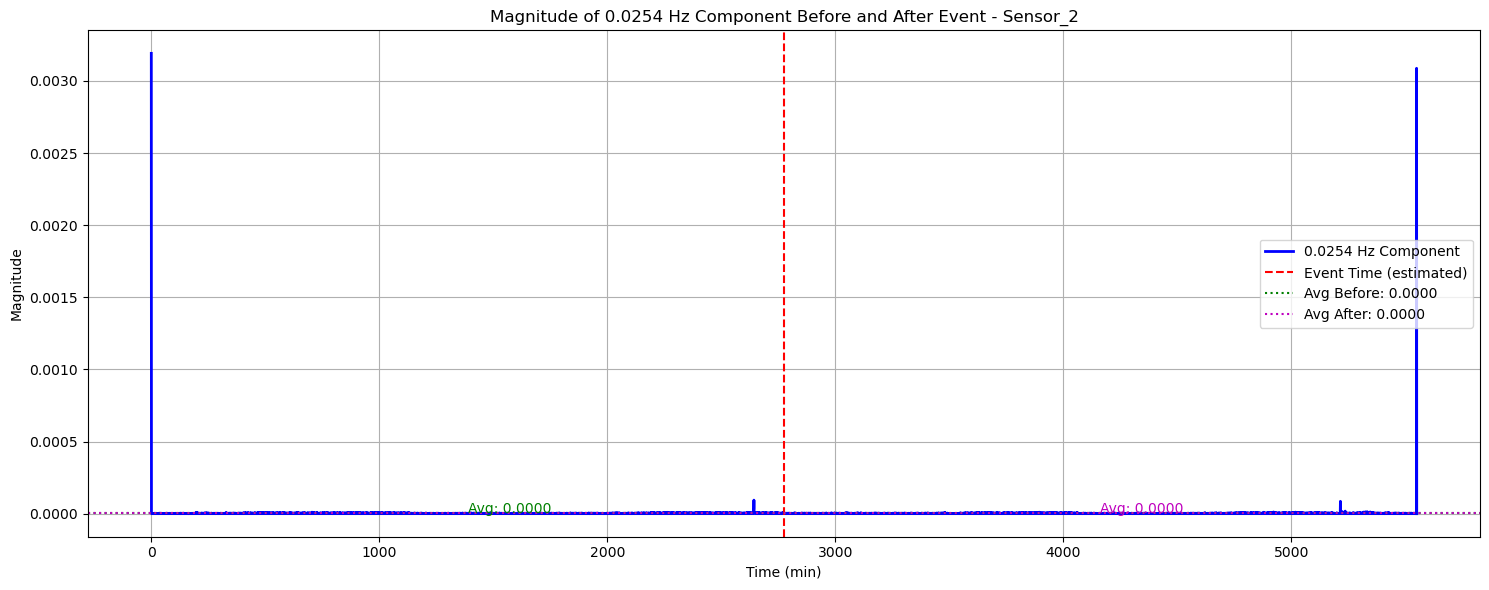


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-6.39%)


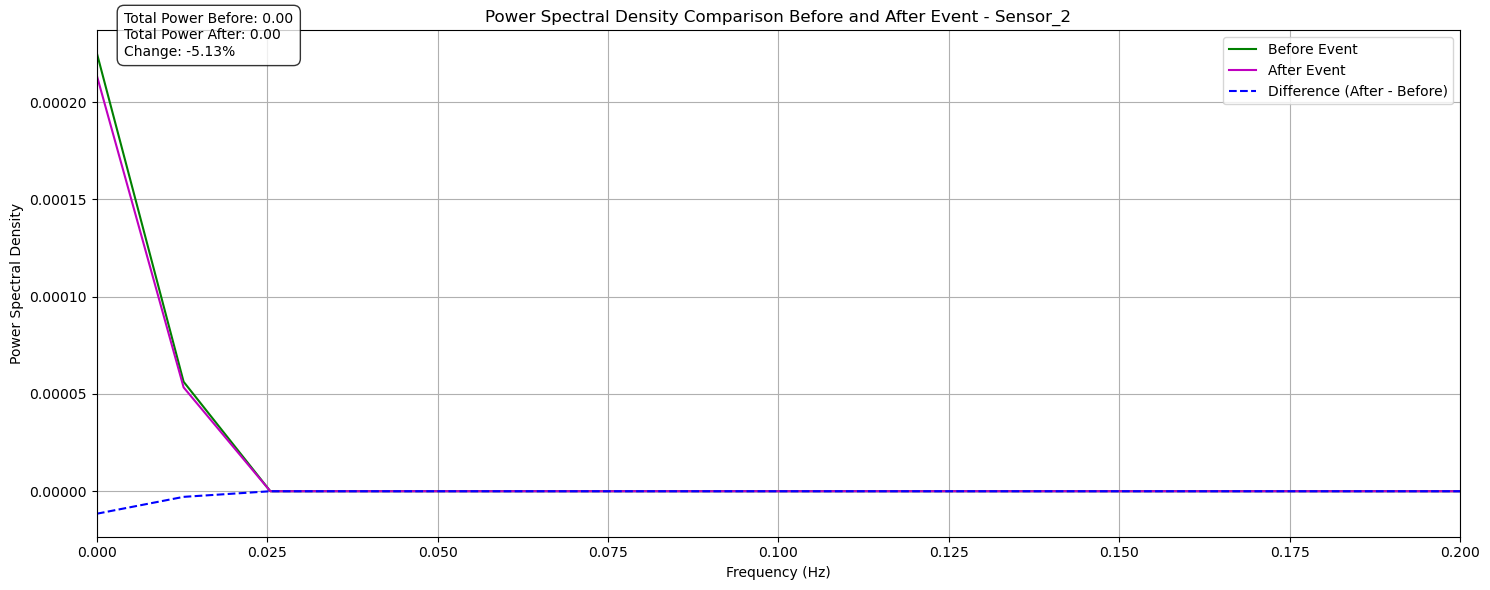


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -5.13%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_2_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
112   1.424845  5.925418e-12  4.563111e-12    -1.362307e-12       -1.286100
104   1.323070  5.946846e-12  4.566461e-12    -1.380385e-12       -1.302903
86    1.094077  6.074316e-12  4.683703e-12    -1.390613e-12       -1.310980
103   1.310348  6.004063e-12  4.559810e-12    -1.444253e-12       -1.362451
94    1.195852  6.012854e-12  4.543004e-12    -1.469851e-12       -1.386483

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.025444  2.414513e-09  2.260700e-09    -1.538138e-10       -6.117039
4   0.050887  3.902466e-1

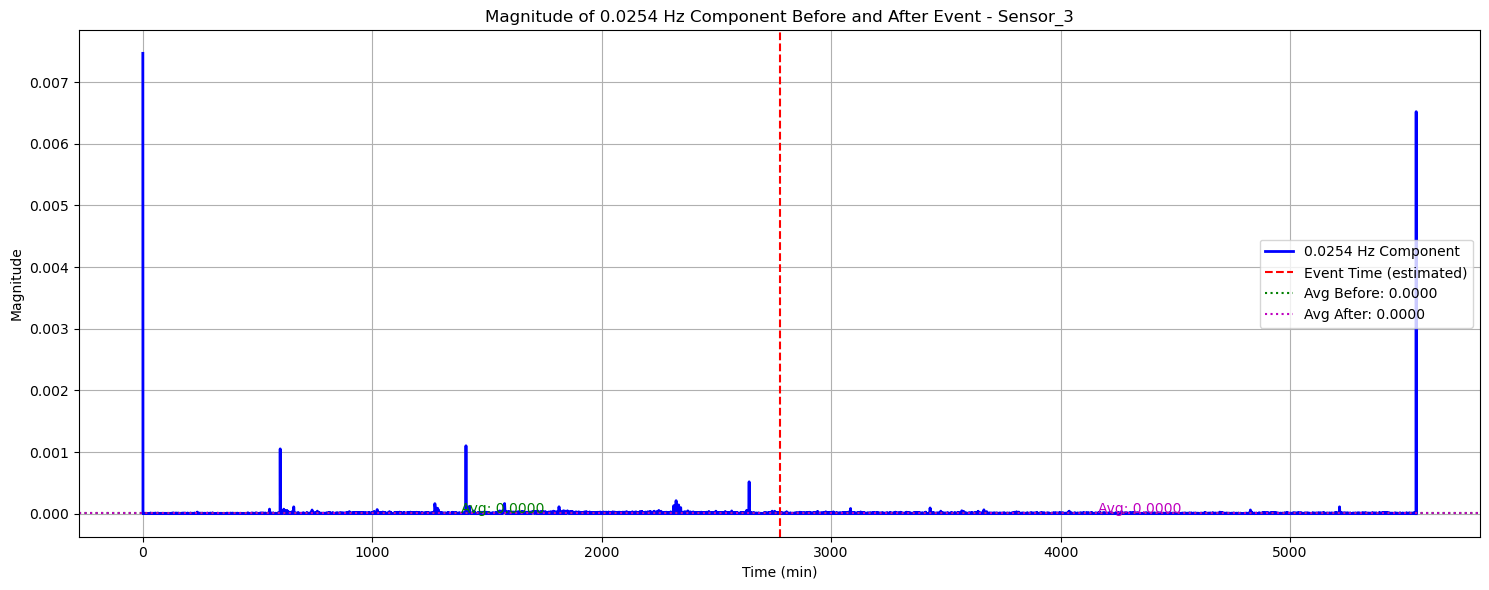


Energy Analysis:
Total energy before event: 0.0001
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-27.97%)


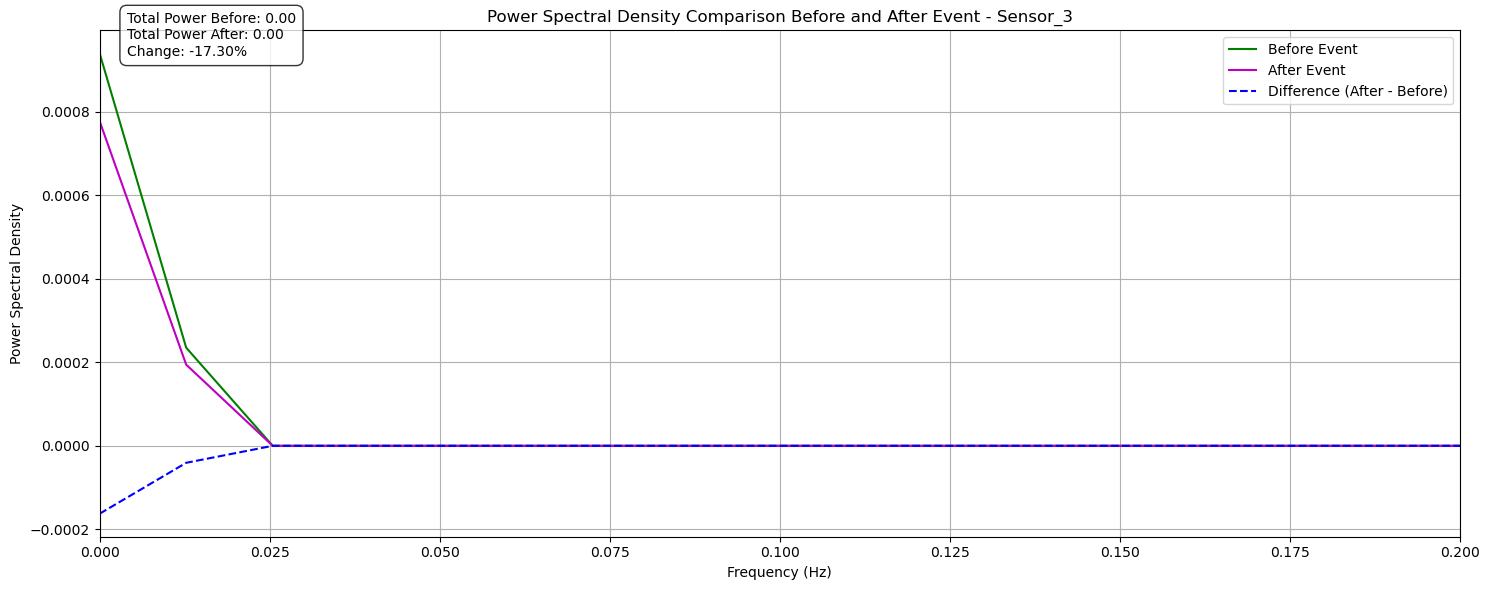


Power Spectral Density Analysis:
Total power before event: 0.0012
Total power after event: 0.0010
Absolute power change: -0.0002
Relative power change: -17.30%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_3_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
123   1.564785  5.600108e-12  4.198759e-12    -1.401349e-12       -1.327034
109   1.386679  5.832944e-12  4.404900e-12    -1.428043e-12       -1.349337
124   1.577507  5.622276e-12  4.193569e-12    -1.428708e-12       -1.352658
126   1.602950  5.614696e-12  4.173121e-12    -1.441575e-12       -1.364938
122   1.552063  5.632298e-12  4.188248e-12    -1.444050e-12       -1.367053

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.025444  1.403132e-08  1.010851e-08    -3.922806e-09      -27.759659
3   0.038165  3.457366e-

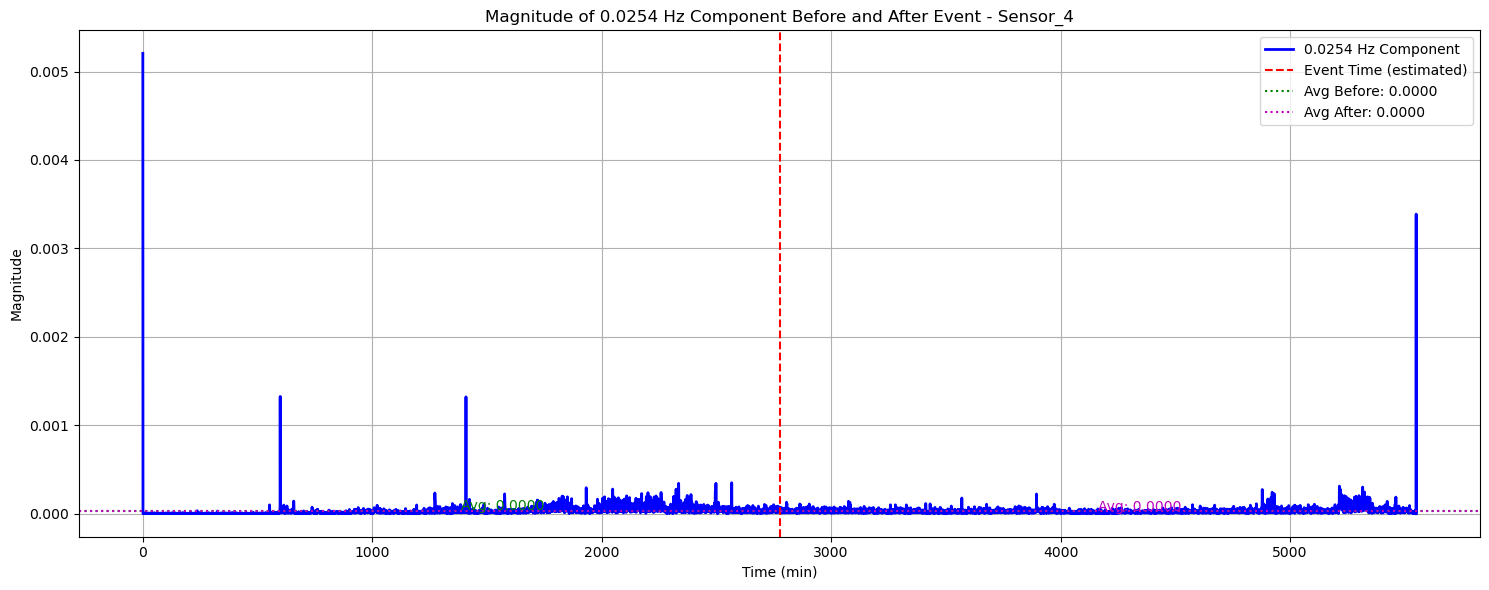


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-53.15%)


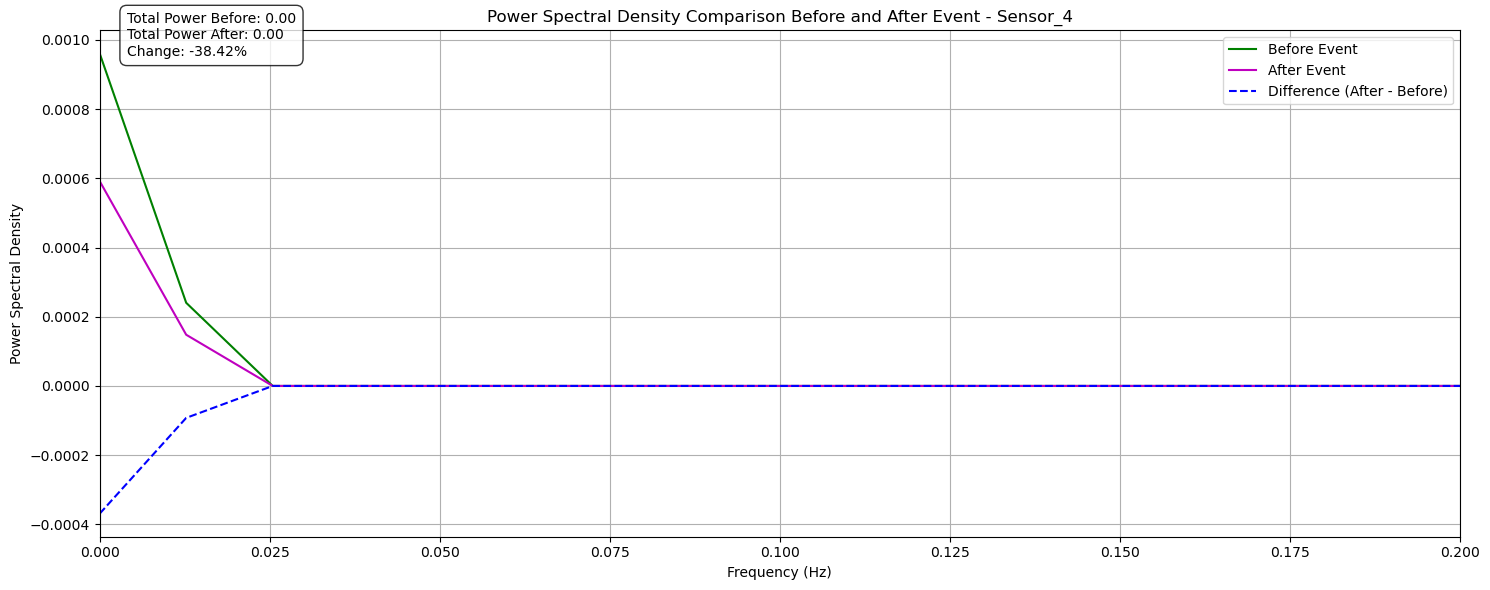


Power Spectral Density Analysis:
Total power before event: 0.0012
Total power after event: 0.0007
Absolute power change: -0.0005
Relative power change: -38.42%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_4_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
126   1.602950  3.515727e-12  1.812596e-12    -1.703131e-12       -1.645287
121   1.539341  3.580070e-12  1.863521e-12    -1.716550e-12       -1.657220
120   1.526619  3.576958e-12  1.855973e-12    -1.720986e-12       -1.661553
123   1.564785  3.566046e-12  1.832305e-12    -1.733741e-12       -1.674044
125   1.590228  3.535230e-12  1.801403e-12    -1.733827e-12       -1.674625

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  1.325388e-09  5.522132e-10    -7.731744e-10      -54.243099
2    0.025444  9.58313

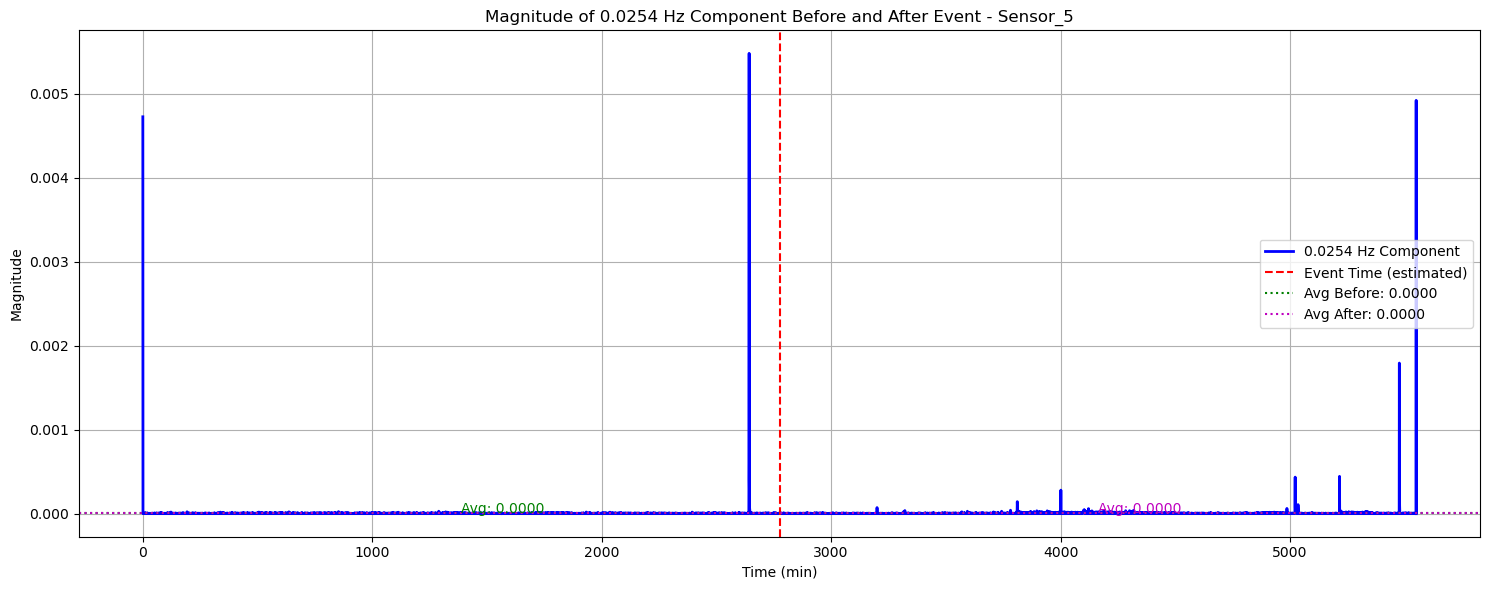


Energy Analysis:
Total energy before event: 0.0001
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-46.59%)


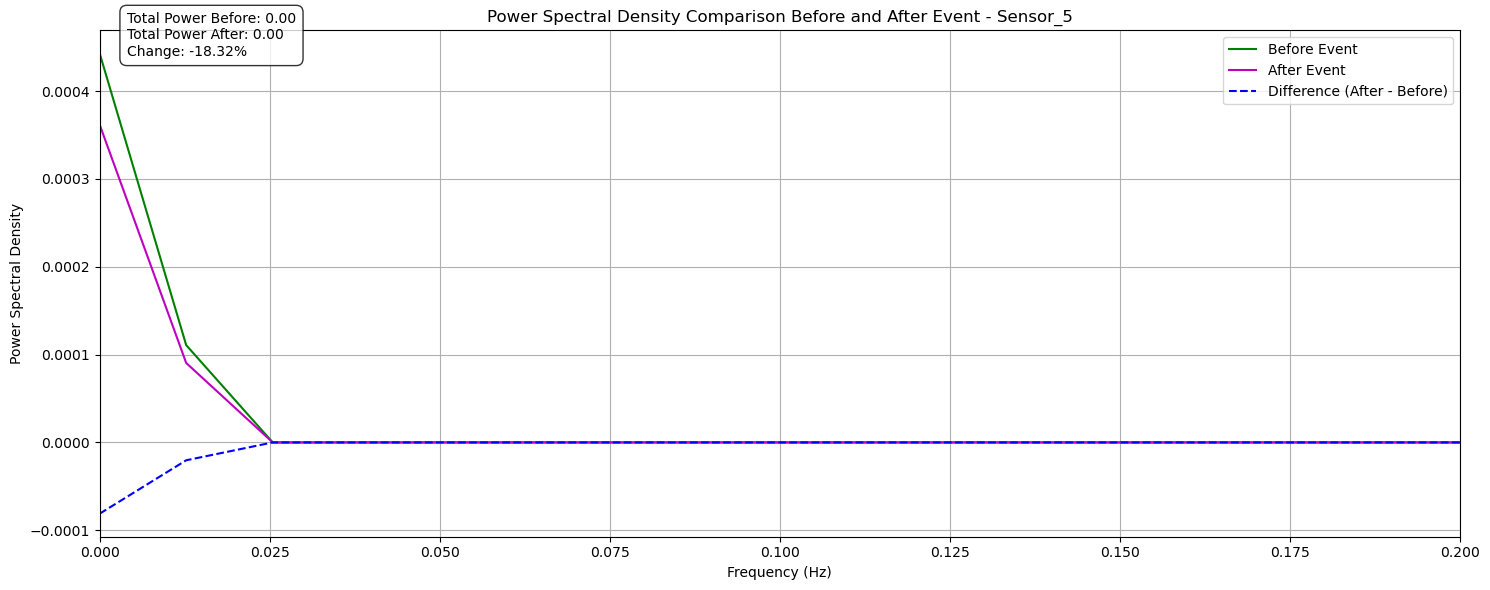


Power Spectral Density Analysis:
Total power before event: 0.0006
Total power after event: 0.0005
Absolute power change: -0.0001
Relative power change: -18.32%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_5_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
128   1.628394  2.838506e-12  2.980126e-12     1.416206e-13        0.137712
124   1.577507  2.852295e-12  2.969386e-12     1.170917e-13        0.113845
122   1.552063  2.900816e-12  2.995063e-12     9.424655e-14        0.091590
125   1.590228  2.875571e-12  2.969403e-12     9.383229e-14        0.091209
120   1.526619  2.917195e-12  3.009608e-12     9.241378e-14        0.089794

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
3   0.038165  4.161382e-09  1.763095e-09    -2.398288e-09      -56.279574
5   0.063609  1.518886e-

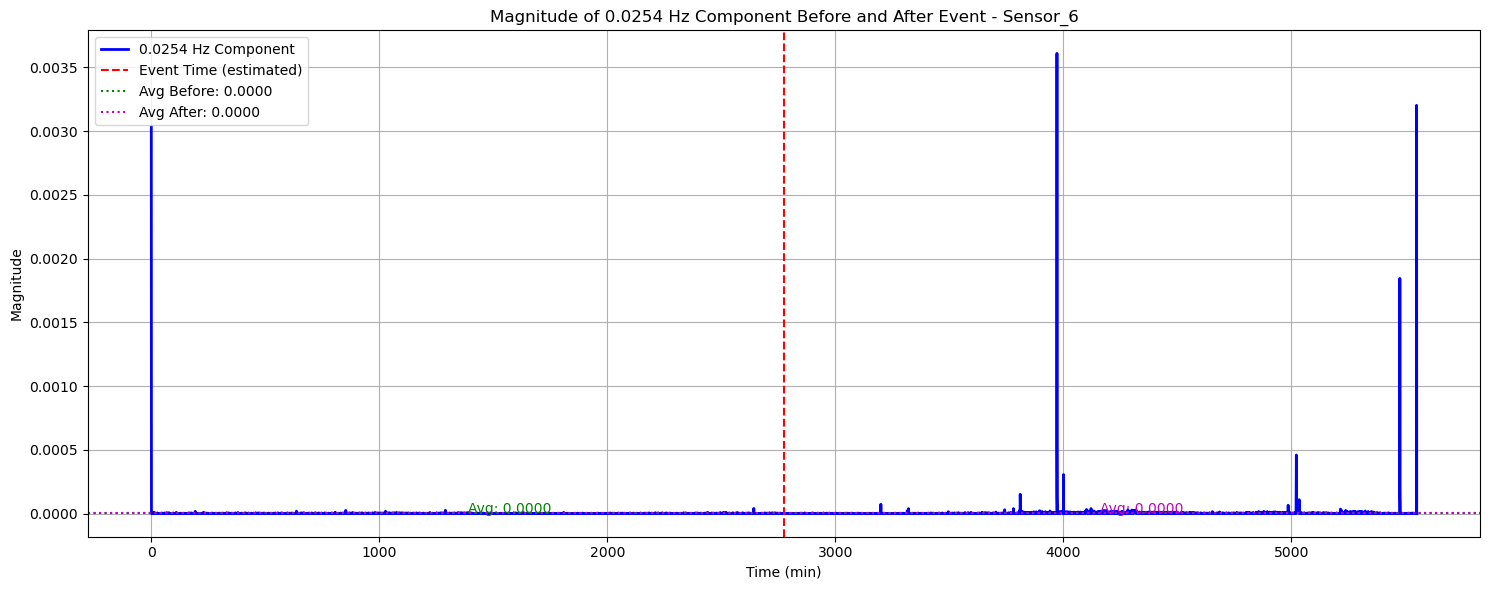


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: 0.0000 (199.51%)


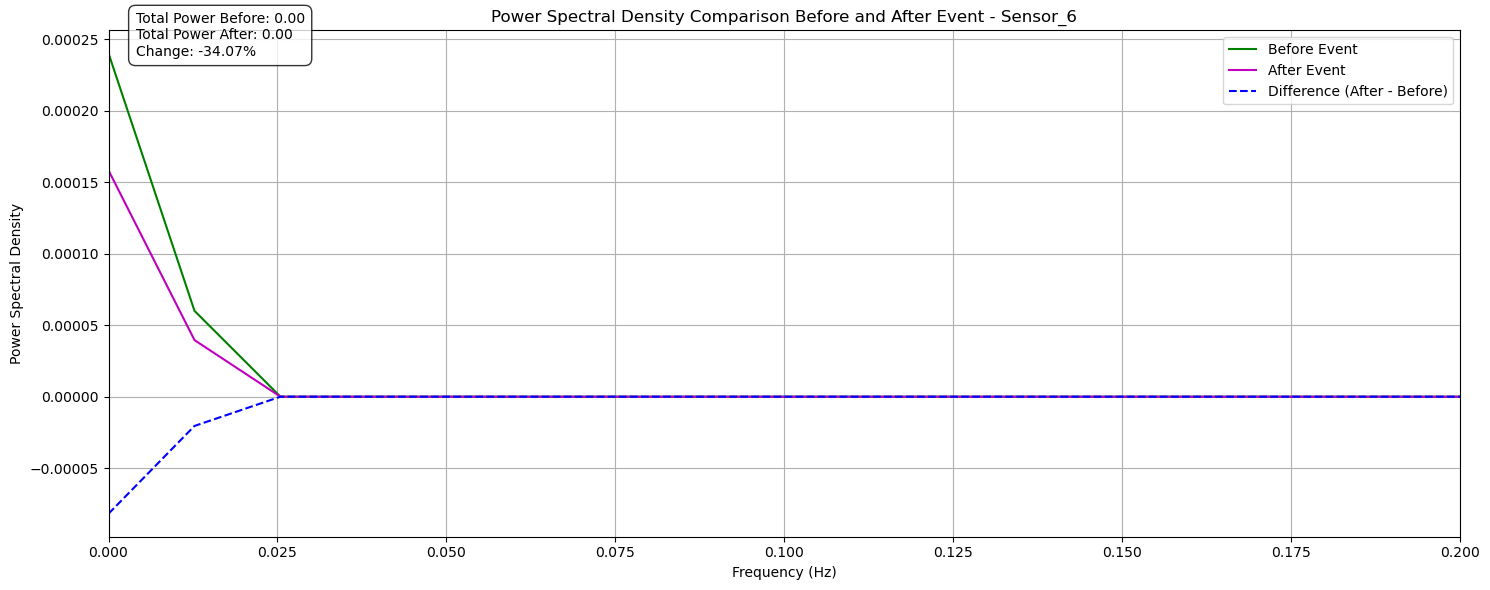


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0002
Absolute power change: -0.0001
Relative power change: -34.07%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_6_significant_changes.csv

Top 5 frequencies with largest power increase:
   Frequency        Before         After  Absolute_Change  Percent_Change
3   0.038165  5.452790e-10  2.100730e-09     1.555451e-09      241.050871
2   0.025444  2.180064e-09  6.531079e-09     4.351015e-09      190.828660
4   0.050887  3.493361e-10  1.182588e-09     8.332523e-10      185.440756
5   0.063609  1.970249e-10  7.270599e-10     5.300350e-10      178.448029
6   0.076331  1.450105e-10  5.058879e-10     3.608774e-10      147.290565

Top 5 frequencies with largest power decrease:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.400599e-04  1.582516e-04    -8.180830e-05      -34.078278
1     0.012722  6.001992e-05  3.

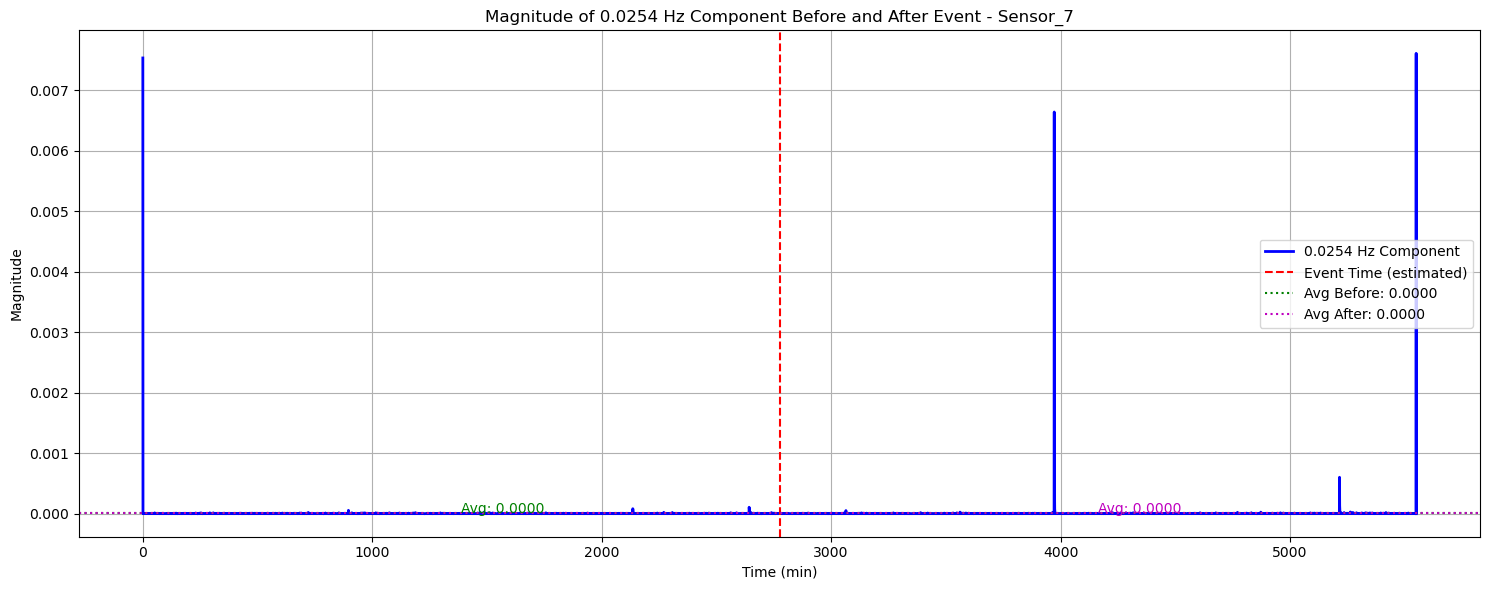


Energy Analysis:
Total energy before event: 0.0001
Total energy after event: 0.0001
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: 0.0000 (81.04%)


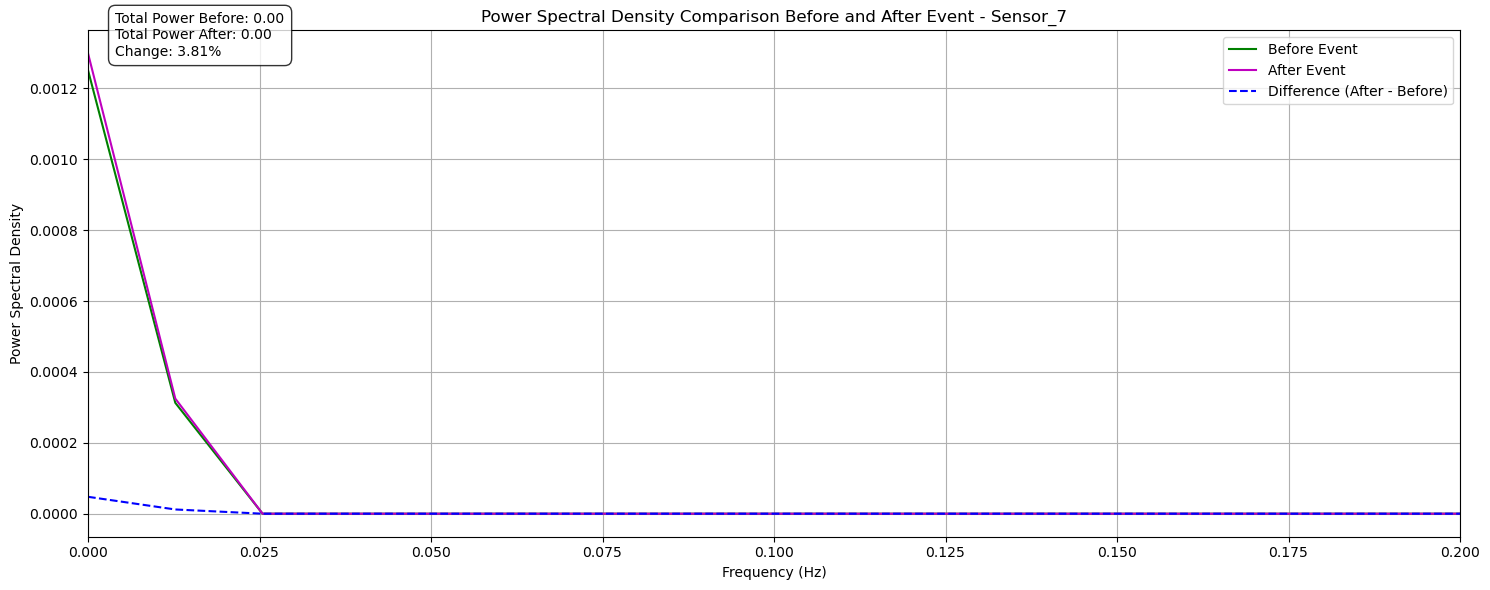


Power Spectral Density Analysis:
Total power before event: 0.0016
Total power after event: 0.0016
Absolute power change: 0.0001
Relative power change: 3.81%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_7_significant_changes.csv

Top 5 frequencies with largest power increase:
   Frequency        Before         After  Absolute_Change  Percent_Change
3   0.038165  3.354371e-09  7.525117e-09     4.170746e-09      120.738223
5   0.063609  1.209876e-09  2.776338e-09     1.566462e-09      119.588598
7   0.089053  6.178898e-10  1.431346e-09     8.134561e-10      113.312110
6   0.076331  8.886773e-10  2.000006e-09     1.111329e-09      112.405602
4   0.050887  2.148308e-09  4.629338e-09     2.481031e-09      110.351040

Top 5 frequencies with largest power decrease:
     Frequency        Before         After  Absolute_Change  Percent_Change
127   1.615672  5.282338e-12  7.702873e-12     2.420535e-12        2.299089
128   1.628394  5.277454e-12  7.714

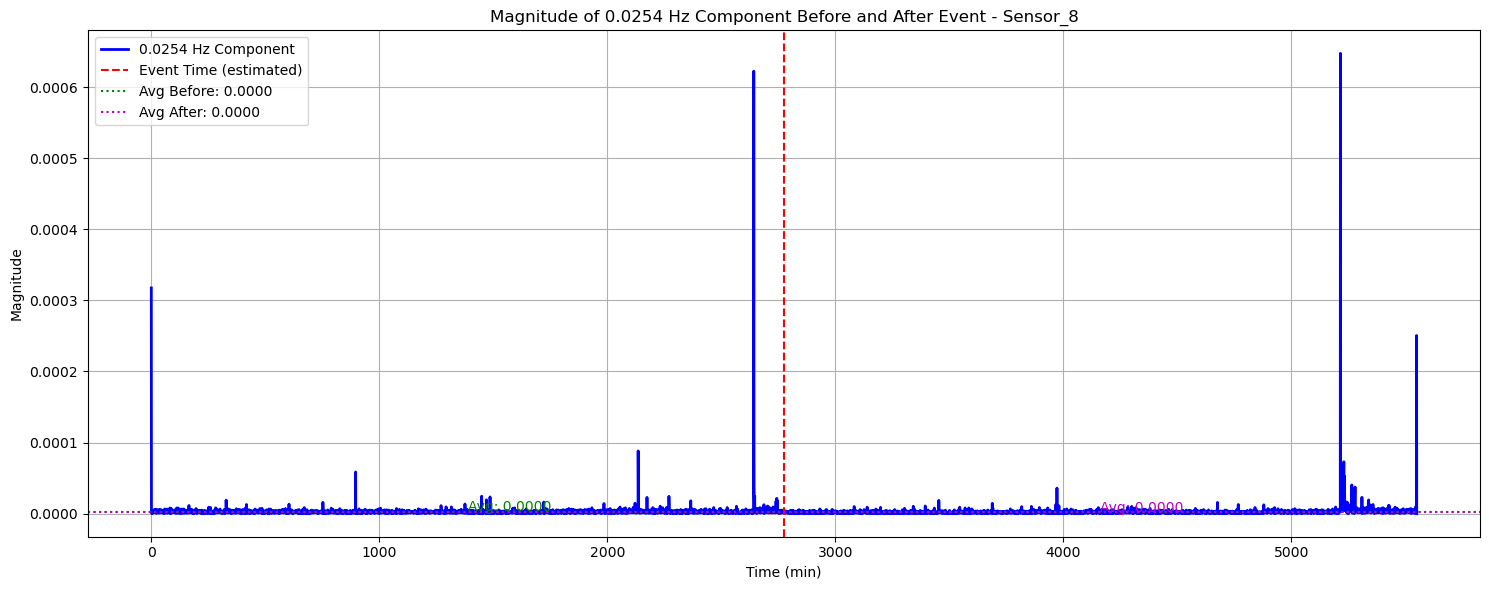


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-1.66%)


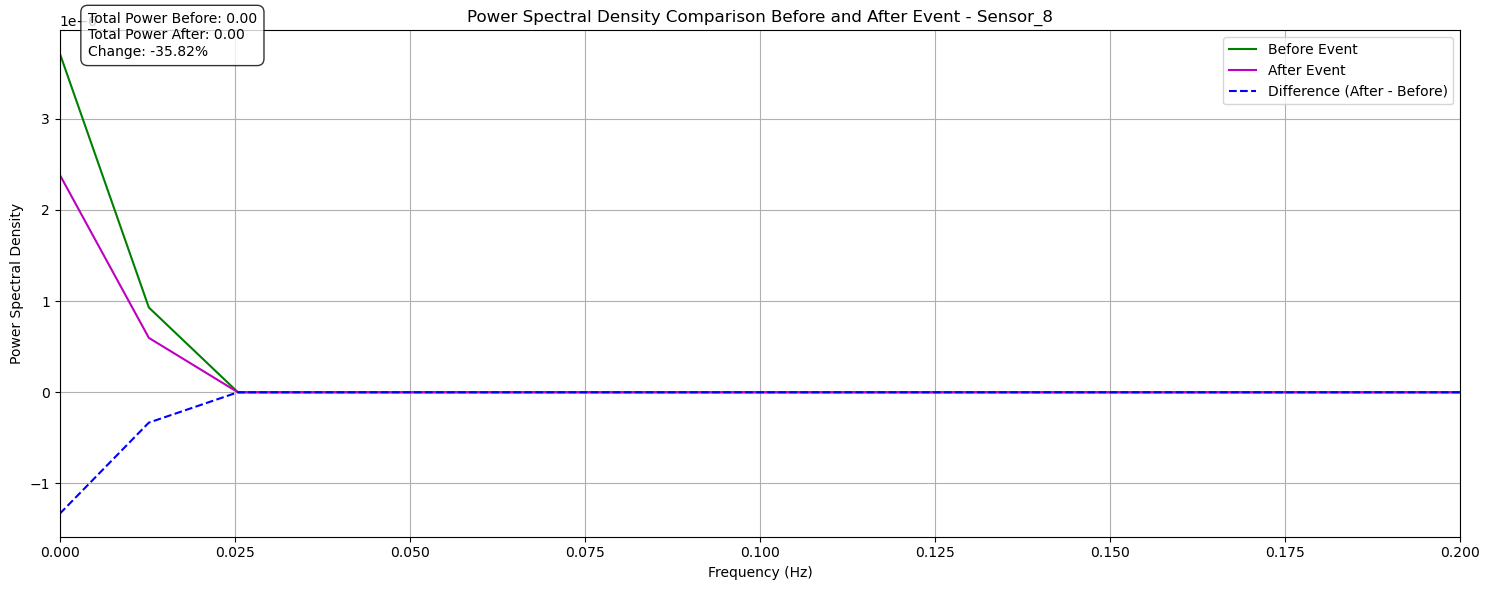


Power Spectral Density Analysis:
Total power before event: 0.0000
Total power after event: 0.0000
Absolute power change: -0.0000
Relative power change: -35.82%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_8_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
92    1.170408  8.583672e-13  6.360847e-13    -2.222824e-13       -0.220391
93    1.183130  8.750507e-13  6.406581e-13    -2.343927e-13       -0.232359
91    1.157686  8.891221e-13  6.470128e-13    -2.421092e-13       -0.239976
90    1.144965  8.877028e-13  6.382193e-13    -2.494835e-13       -0.247288
127   1.615672  8.903112e-13  6.242603e-13    -2.660509e-13       -0.263703

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
0   0.000000  3.716232e-06  2.384814e-06    -1.331418e-06      -35.826134
1   0.012722  9.293383e-

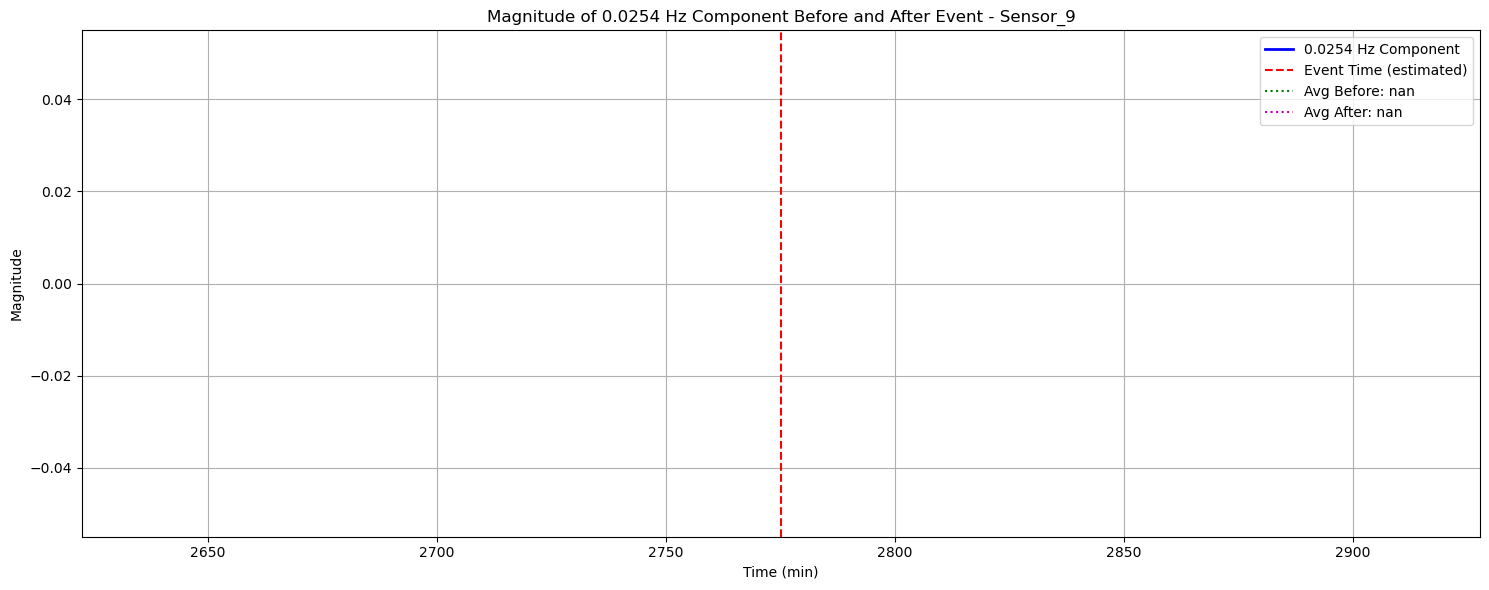


Energy Analysis:
Total energy before event: nan
Total energy after event: nan
Average energy before event: nan
Average energy after event: nan
Energy change: nan (nan%)


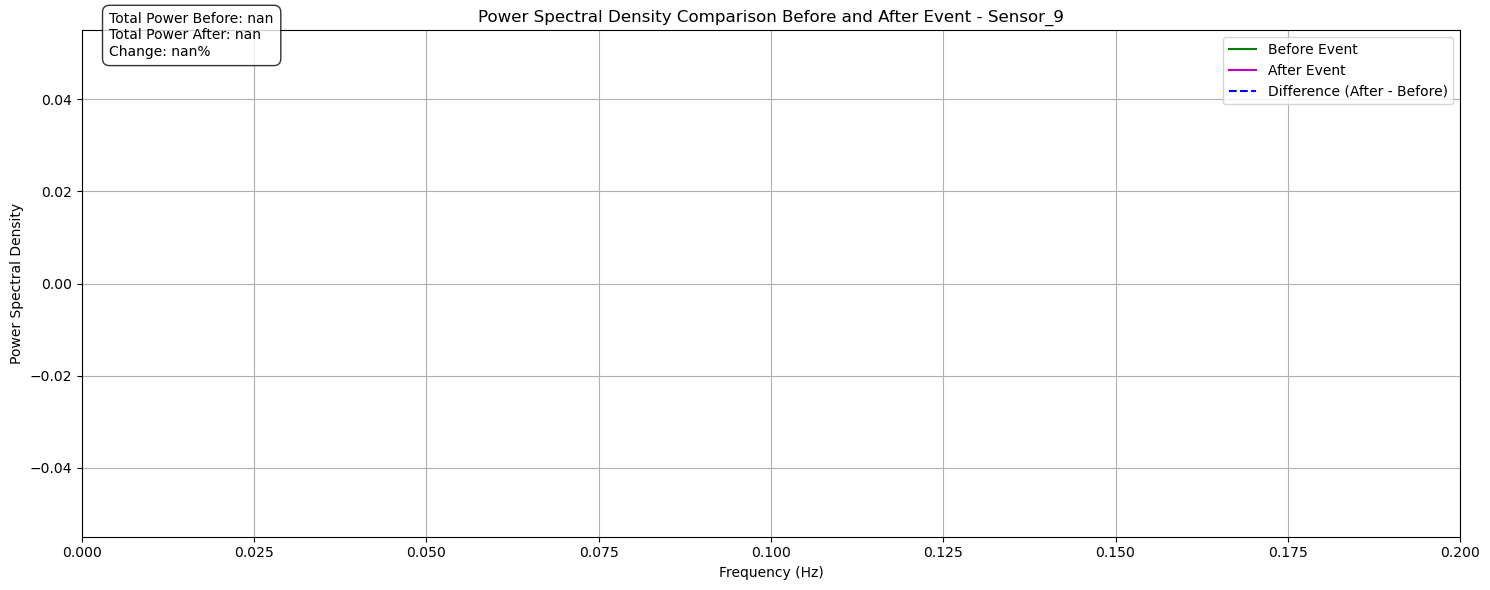


Power Spectral Density Analysis:
Total power before event: nan
Total power after event: nan
Absolute power change: nan
Relative power change: nan%
Saved significant changes data to: significant_changes_csv_Mushroom_25-05-08_0326\Sensor_9_significant_changes.csv

Top 5 frequencies with largest power increase:
   Frequency  Before  After  Absolute_Change  Percent_Change
0   0.000000     NaN    NaN              NaN             NaN
1   0.012722     NaN    NaN              NaN             NaN
2   0.025444     NaN    NaN              NaN             NaN
3   0.038165     NaN    NaN              NaN             NaN
4   0.050887     NaN    NaN              NaN             NaN

Top 5 frequencies with largest power decrease:
   Frequency  Before  After  Absolute_Change  Percent_Change
0   0.000000     NaN    NaN              NaN             NaN
1   0.012722     NaN    NaN              NaN             NaN
2   0.025444     NaN    NaN              NaN             NaN
3   0.038165     NaN    NaN    

In [28]:
# Analyze the 0.02Hz frequency band before and after event for each sensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# Get dataset name from the notebook filename
notebook_name = os.path.basename(__file__) if '__file__' in globals() else 'Mushroom_25-05-08_0326'
if notebook_name.endswith('.ipynb'):
    notebook_name = notebook_name[:-6]  # Remove .ipynb extension
if notebook_name.startswith('da_'):
    notebook_name = notebook_name[3:]  # Remove da_ prefix

# Create a directory to save CSV files with dataset name
csv_dir = f"significant_changes_csv_{notebook_name}"
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
    print(f"Created directory: {csv_dir}")

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

# Find the event time (assuming it's at the center of the filtered data)
event_time = window_data['Timestamp'].mean()

# Loop through each voltage channel
for channel_to_analyze in voltage_columns:
    print(f"\n=== Analysis for {channel_to_analyze} ===")
    voltage_data = window_data[channel_to_analyze].values
    
    # Perform STFT for the selected channel
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Find the closest frequency to 0.02Hz in the STFT results
    target_freq = 0.02
    freq_idx = np.argmin(np.abs(f - target_freq))
    actual_freq = f[freq_idx]
    print(f"Analyzing frequency: {actual_freq:.4f} Hz (closest to 0.02 Hz)")
    
    # Extract the magnitude data for this frequency
    freq_magnitude = np.abs(Zxx[freq_idx, :])
    
    # Create a time axis in minutes for better visualization
    time_min = t / 60
    
    # Plot the magnitude of the 0.02Hz component over time
    plt.figure(figsize=(15, 6))
    
    # Plot the magnitude
    plt.plot(time_min, freq_magnitude, 'b-', linewidth=2, label=f'{actual_freq:.4f} Hz Component')
    
    # Convert event time to minutes
    event_time_min = t.mean() / 60
    plt.axvline(x=event_time_min, color='r', linestyle='--', label='Event Time (estimated)')
    
    # Calculate average magnitude before and after event
    before_mask = t < t.mean()
    after_mask = t >= t.mean()
    
    avg_before = np.mean(freq_magnitude[before_mask])
    avg_after = np.mean(freq_magnitude[after_mask])
    
    print(f"Average magnitude before event: {avg_before:.4f}")
    print(f"Average magnitude after event: {avg_after:.4f}")
    print(f"Change: {(avg_after - avg_before):.4f} ({(avg_after - avg_before)/avg_before*100:.2f}%)")
    
    # Add horizontal lines showing the average values
    plt.axhline(y=avg_before, color='g', linestyle=':', label=f'Avg Before: {avg_before:.4f}')
    plt.axhline(y=avg_after, color='m', linestyle=':', label=f'Avg After: {avg_after:.4f}')
    
    # Add annotations
    plt.annotate(f"Avg: {avg_before:.4f}", xy=(time_min[len(time_min)//4], avg_before), 
                 xytext=(time_min[len(time_min)//4], avg_before*1.1), color='g')
    plt.annotate(f"Avg: {avg_after:.4f}", xy=(time_min[3*len(time_min)//4], avg_after), 
                 xytext=(time_min[3*len(time_min)//4], avg_after*1.1), color='m')
    
    # Set axis labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude of {actual_freq:.4f} Hz Component Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate energy (integral of magnitude squared) before and after event
    energy_before = np.sum(freq_magnitude[before_mask]**2)
    energy_after = np.sum(freq_magnitude[after_mask]**2)
    
    # Normalize by the number of samples to get average energy
    num_samples_before = np.sum(before_mask)
    num_samples_after = np.sum(after_mask)
    avg_energy_before = energy_before / num_samples_before
    avg_energy_after = energy_after / num_samples_after
    
    print("\nEnergy Analysis:")
    print(f"Total energy before event: {energy_before:.4f}")
    print(f"Total energy after event: {energy_after:.4f}")
    print(f"Average energy before event: {avg_energy_before:.4f}")
    print(f"Average energy after event: {avg_energy_after:.4f}")
    print(f"Energy change: {(avg_energy_after - avg_energy_before):.4f} ({(avg_energy_after - avg_energy_before)/avg_energy_before*100:.2f}%)")
    
    # Power Spectral Density (PSD) Analysis
    # Calculate power (magnitude squared)
    power_matrix = np.abs(Zxx) ** 2
    
    # Convert time to minutes for consistency with previous plots
    time_min = t / 60
    
    # Define the event time point (assuming same as before)
    event_time_min = time_min[len(time_min) // 2]  # Middle point as event time
    
    # Create masks for before and after event
    before_mask_time = time_min < event_time_min
    after_mask_time = time_min > event_time_min
    
    # Calculate average PSD before and after event
    avg_psd_before = np.mean(power_matrix[:, before_mask_time], axis=1)
    avg_psd_after = np.mean(power_matrix[:, after_mask_time], axis=1)
    
    # Plot the power spectral density comparison
    plt.figure(figsize=(15, 6))
    plt.plot(f, avg_psd_before, 'g-', label='Before Event')
    plt.plot(f, avg_psd_after, 'm-', label='After Event')
    
    # Calculate and display the difference
    psd_diff = avg_psd_after - avg_psd_before
    plt.plot(f, psd_diff, 'b--', label='Difference (After - Before)')
    
    # Set axis labels and title
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0, 0.2)  # Limit x-axis to show only frequencies below 0.2 Hz
    plt.ylabel('Power Spectral Density')
    plt.title(f'Power Spectral Density Comparison Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    
    # Add text box with summary statistics
    total_power_before = np.sum(avg_psd_before)
    total_power_after = np.sum(avg_psd_after)
    power_change = (total_power_after - total_power_before) / total_power_before * 100
    
    stats_text = f"Total Power Before: {total_power_before:.2f}\n"
    stats_text += f"Total Power After: {total_power_after:.2f}\n"
    stats_text += f"Change: {power_change:.2f}%"
    
    plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nPower Spectral Density Analysis:")
    print(f"Total power before event: {total_power_before:.4f}")
    print(f"Total power after event: {total_power_after:.4f}")
    print(f"Absolute power change: {total_power_after - total_power_before:.4f}")
    print(f"Relative power change: {power_change:.2f}%")
    
    # Find frequency bands with the most significant changes
    freq_change_percent = (avg_psd_after - avg_psd_before) / (avg_psd_before + 1e-10) * 100  # Avoid division by zero
    significant_changes = pd.DataFrame({
        'Frequency': f,
        'Before': avg_psd_before,
        'After': avg_psd_after,
        'Absolute_Change': avg_psd_after - avg_psd_before,
        'Percent_Change': freq_change_percent
    })
    
    # Save the significant_changes DataFrame to CSV
    csv_filename = os.path.join(csv_dir, f"{channel_to_analyze}_significant_changes.csv")
    significant_changes.to_csv(csv_filename, index=False)
    print(f"Saved significant changes data to: {csv_filename}")
    
    # Display top 5 frequencies with largest increase and decrease
    print("\nTop 5 frequencies with largest power increase:")
    print(significant_changes.sort_values('Percent_Change', ascending=False).head(5))
    
    print("\nTop 5 frequencies with largest power decrease:")
    print(significant_changes.sort_values('Percent_Change', ascending=True).head(5))


In [29]:
# Delete data for the 9th sensor in the significant_changes_csv_Mushroom_25-05-08_0326 directory

import os
import shutil

# Define the directory containing the CSV files
csv_dir_path = "significant_changes_csv_Mushroom_25-05-08_0326"

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir_path) if f.endswith('_significant_changes.csv')]

# Sort the files to ensure consistent ordering
csv_files.sort()

# Check if we have at least 9 sensors
if len(csv_files) >= 9:
    # Get the 9th sensor's filename (index 8 since zero-based)
    ninth_sensor_file = csv_files[8]
    ninth_sensor_path = os.path.join(csv_dir_path, ninth_sensor_file)
    
    # Print information about the file being deleted
    print(f"Deleting data for the 9th sensor: {ninth_sensor_file}")
    
    # Option 1: Delete the file
    os.remove(ninth_sensor_path)
    print(f"File {ninth_sensor_file} has been deleted.")
    
    # Alternative option (commented out): Create a backup instead of deleting
    # backup_path = ninth_sensor_path + ".backup"
    # shutil.copy2(ninth_sensor_path, backup_path)
    # os.remove(ninth_sensor_path)
    # print(f"File {ninth_sensor_file} has been deleted. Backup created at {backup_path}")
else:
    print(f"There are only {len(csv_files)} sensor files in the directory, cannot delete the 9th sensor.")


Deleting data for the 9th sensor: Sensor_9_significant_changes.csv
File Sensor_9_significant_changes.csv has been deleted.



Analyzing significant changes across all sensors...


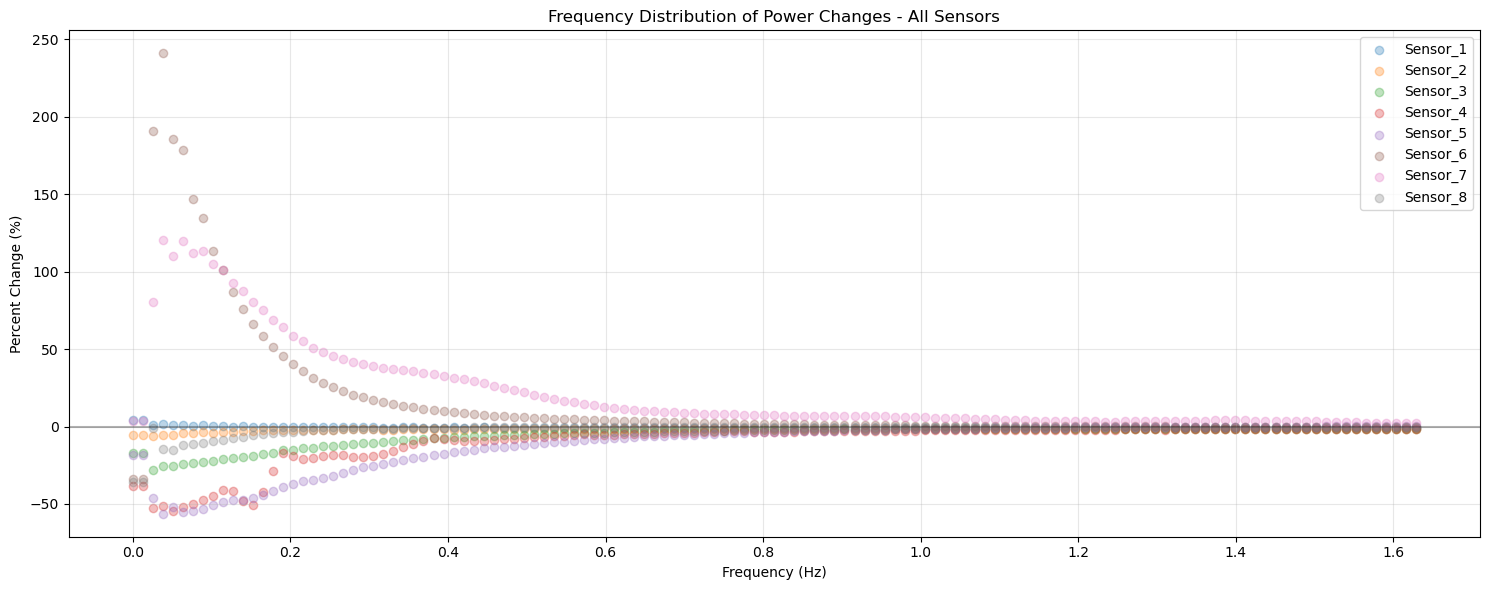


Analyzing patterns in top increases and decreases...


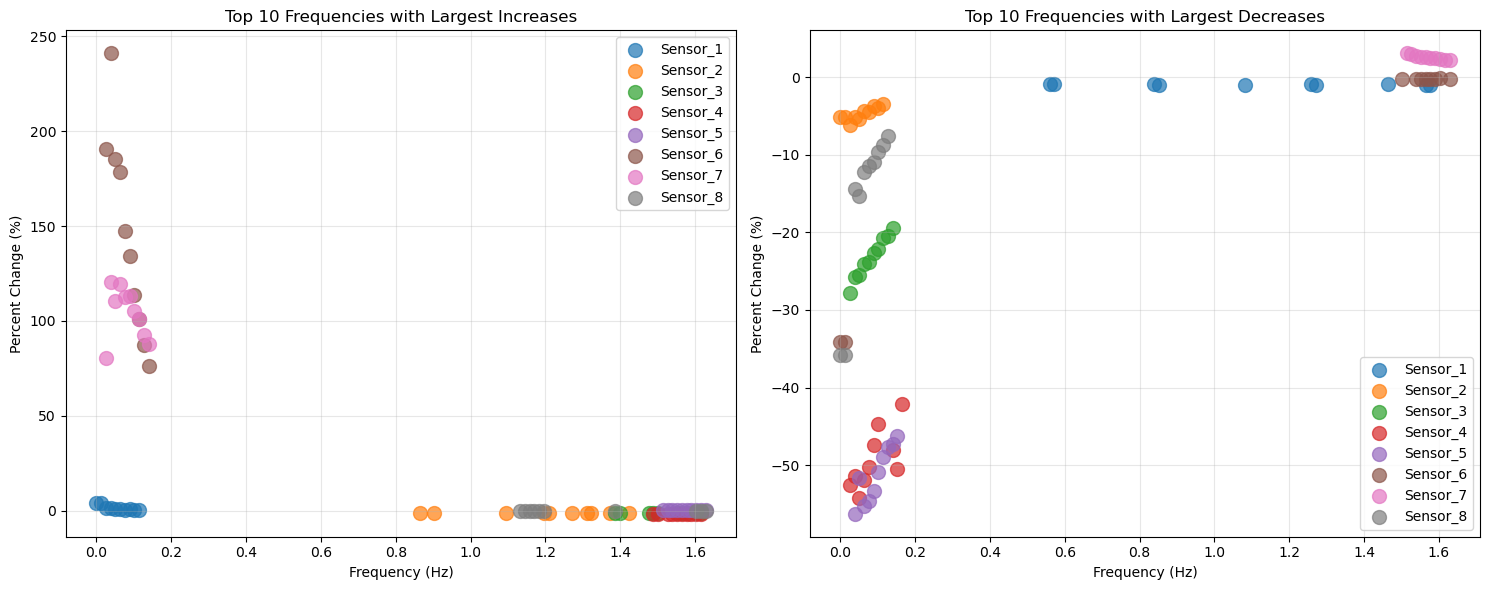


Analyzing frequency overlap between sensors...
Common frequencies showing increases across all sensors: []
Common frequencies showing decreases across all sensors: []


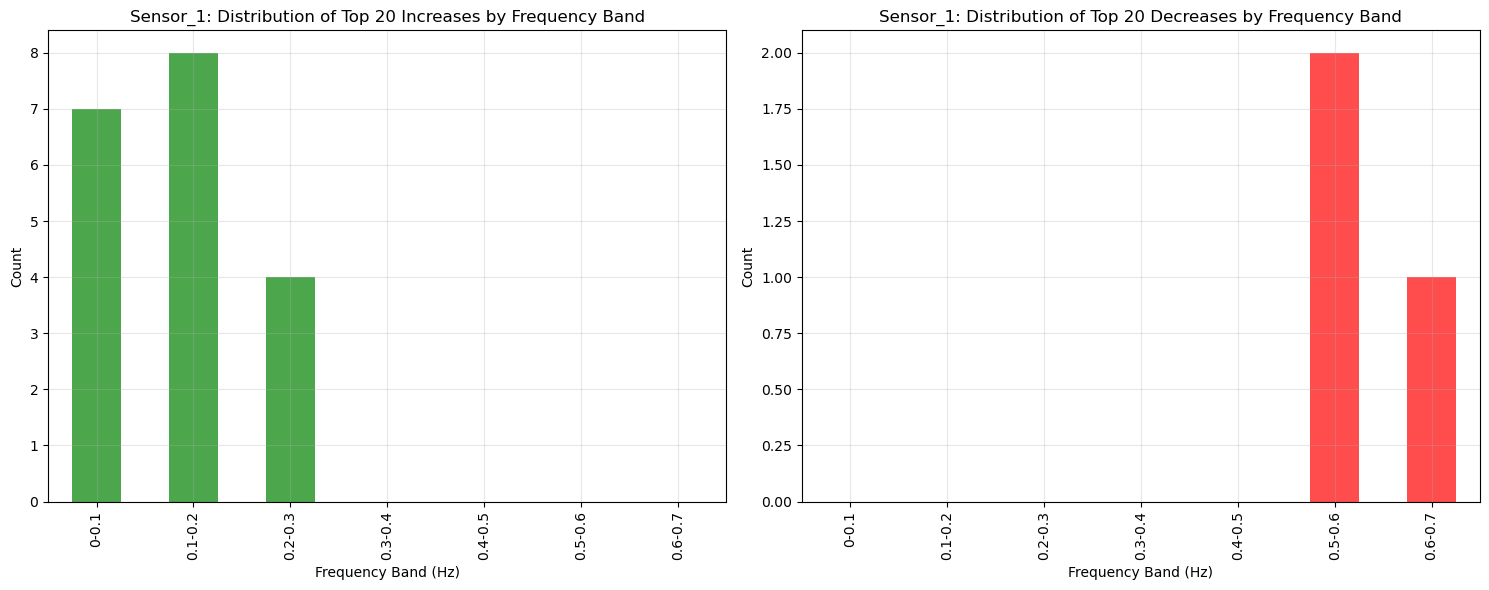

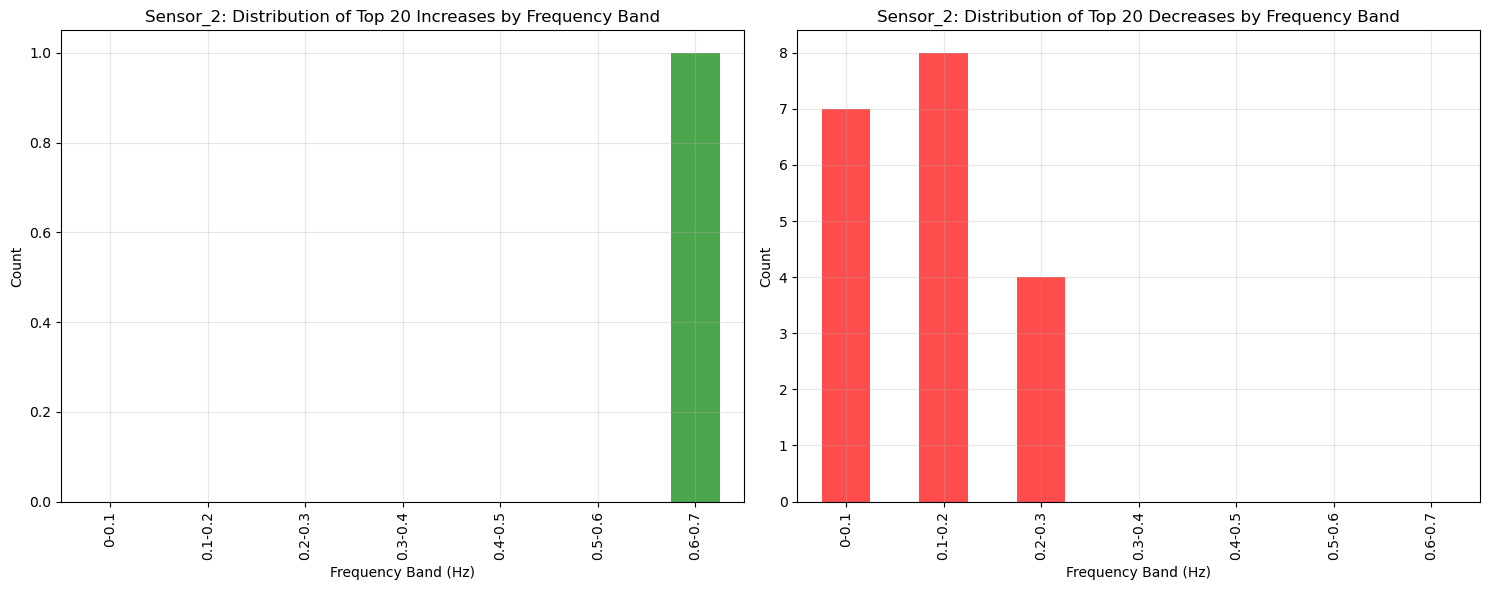

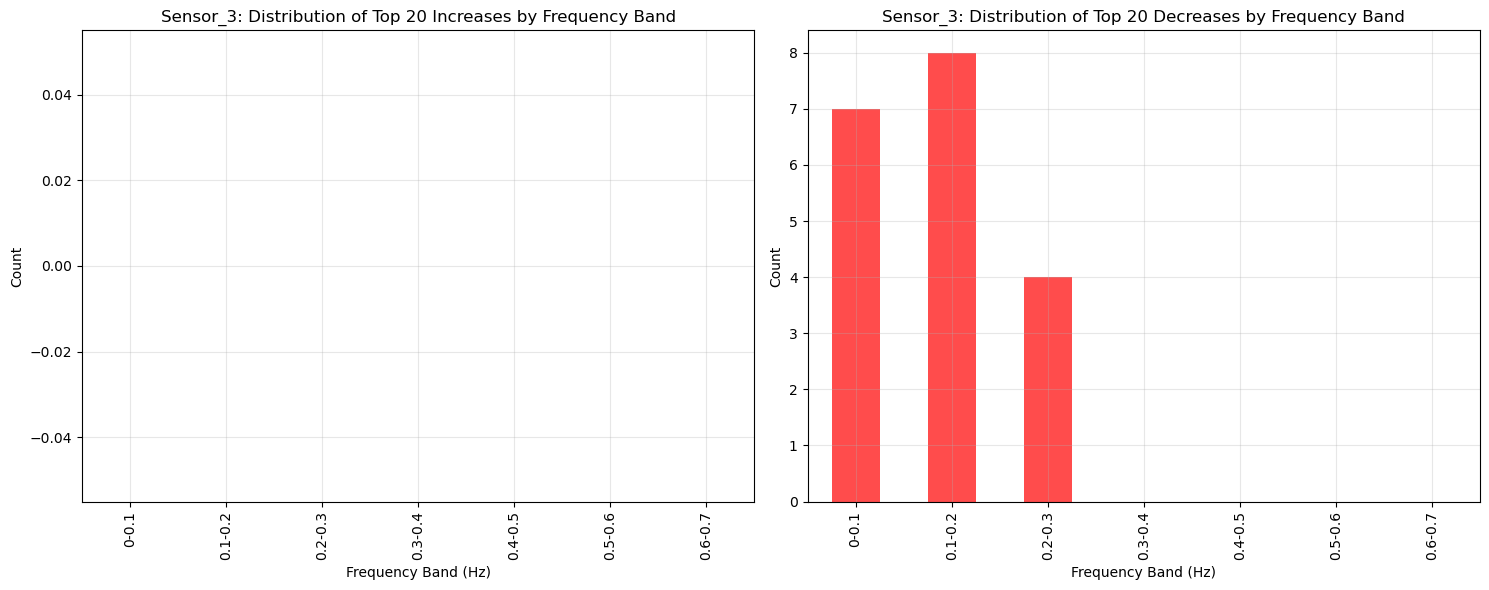

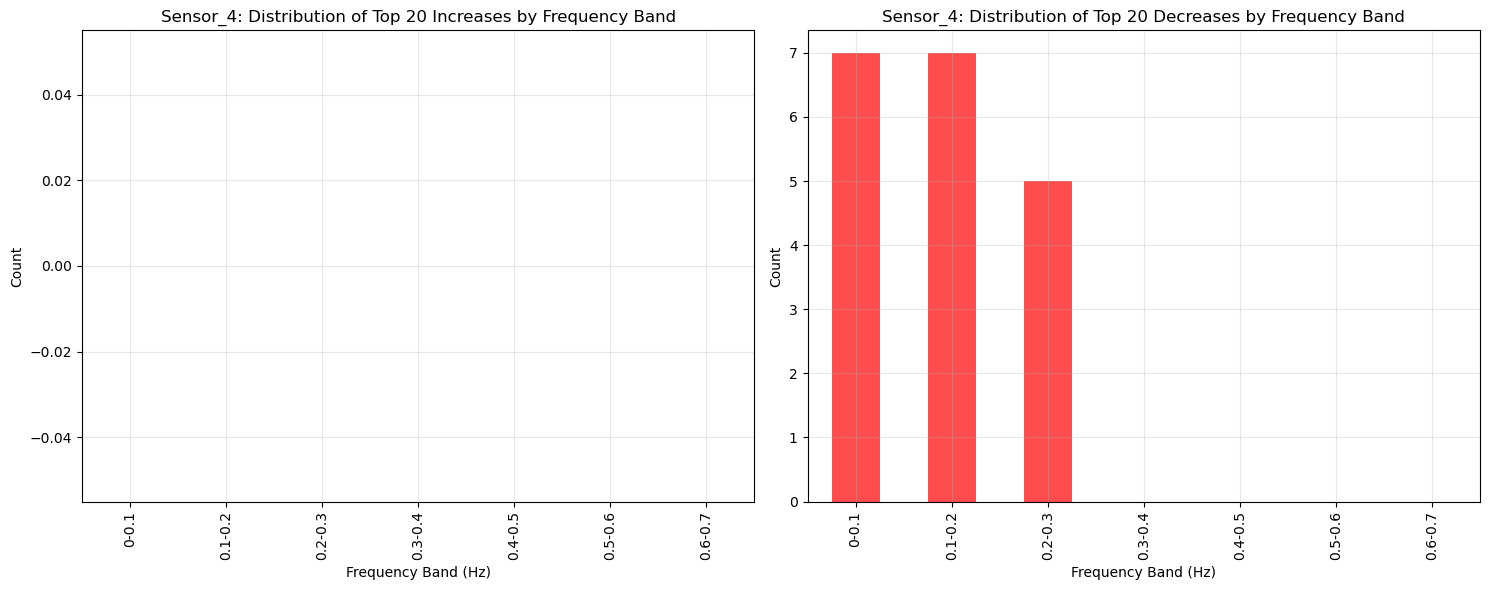

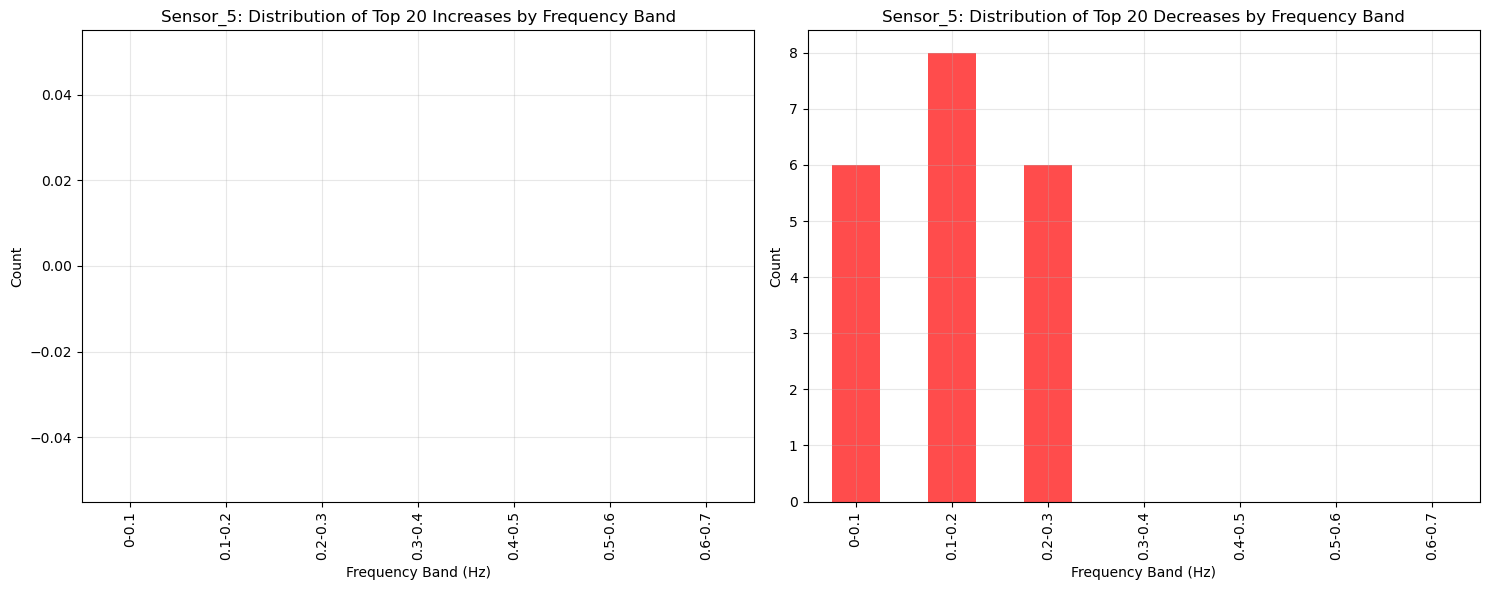

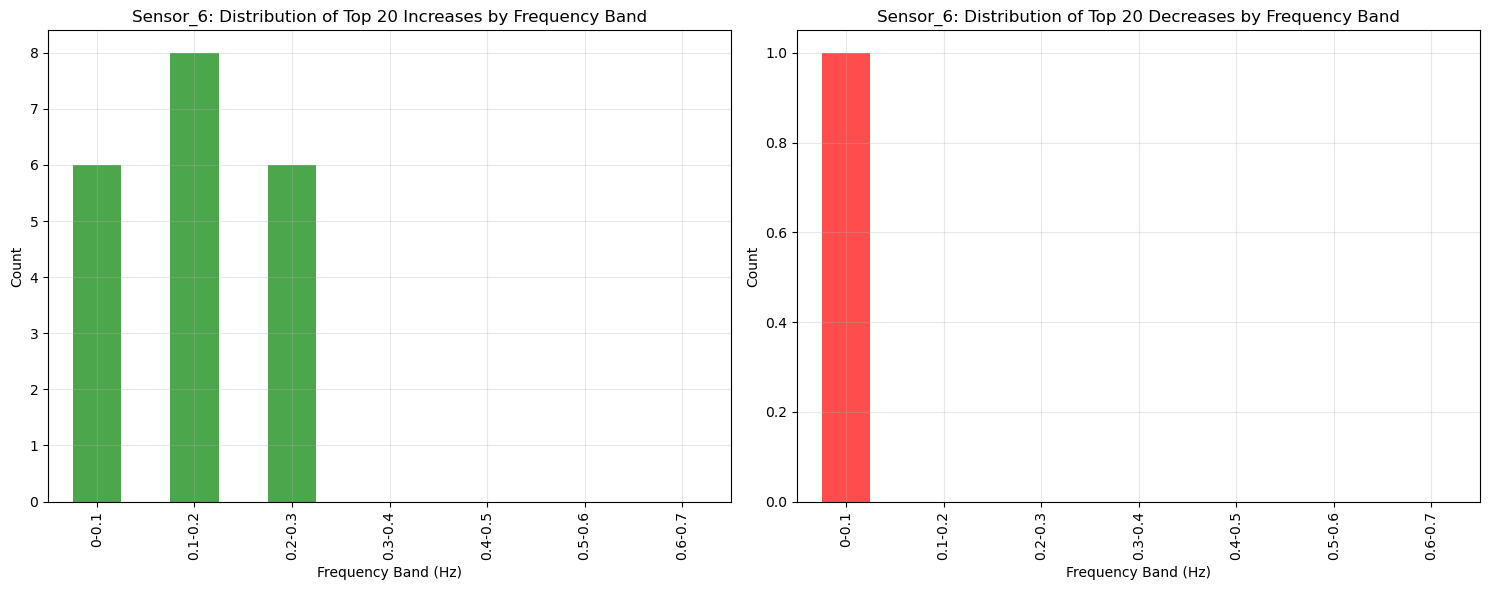

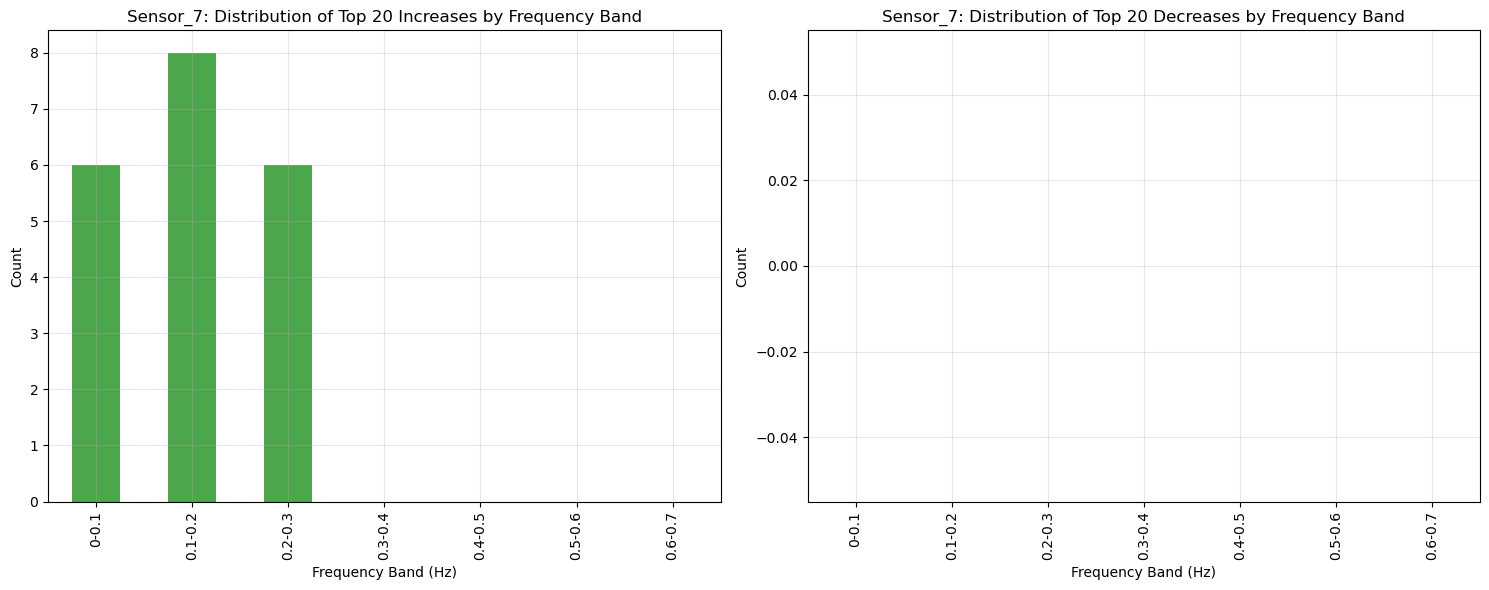

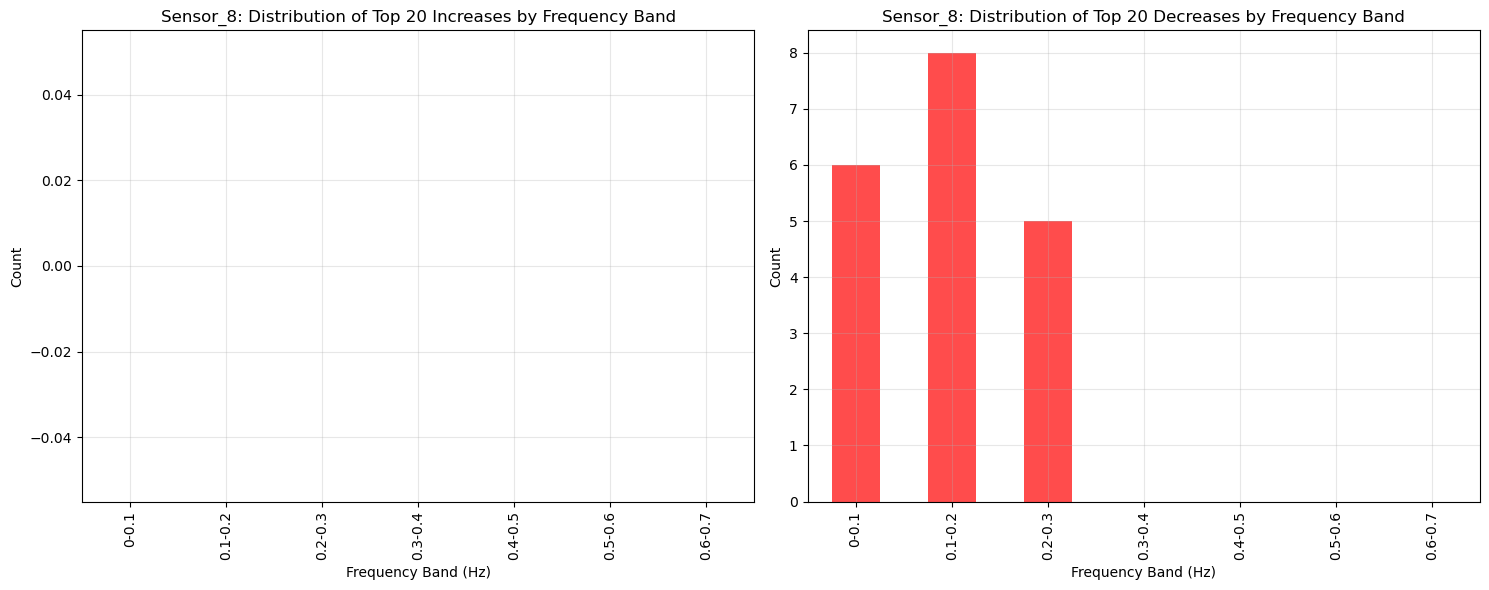

In [30]:
import seaborn as sns

# Analyze significant changes across all sensors
print("\nAnalyzing significant changes across all sensors...")

# Define the directory containing the CSV files
csv_dir_path = "significant_changes_csv_Mushroom_25-05-08_0326"

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir_path) if f.endswith('_significant_changes.csv')]

# Initialize lists to store summary data
sensor_names = []
top_increase_freqs = []
top_decrease_freqs = []
all_sensor_data = {}

# Create a figure for comparing all sensors
plt.figure(figsize=(15, 6))

# Process each sensor's data
for csv_file in csv_files:
    # Extract sensor name from filename
    sensor_name = csv_file.split('_significant_changes.csv')[0]
    sensor_names.append(sensor_name)
    
    # Load the CSV data
    csv_path = os.path.join(csv_dir_path, csv_file)
    sensor_data = pd.read_csv(csv_path)
    all_sensor_data[sensor_name] = sensor_data
    
    # Sort by absolute percent change
    sensor_data['Abs_Percent_Change'] = np.abs(sensor_data['Percent_Change'])
    
    # Get top increases and decreases
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_increase_freqs.append(top_increases['Frequency'].tolist())
    
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    top_decrease_freqs.append(top_decreases['Frequency'].tolist())
    
    # Plot frequency vs percent change for this sensor
    plt.scatter(sensor_data['Frequency'], sensor_data['Percent_Change'], 
                alpha=0.3, label=sensor_name)

# Add plot details
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.title('Frequency Distribution of Power Changes - All Sensors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze patterns in top increases and decreases
print("\nAnalyzing patterns in top increases and decreases...")

# Create figures for top increases and decreases
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(10)
    plt.scatter(top_increases['Frequency'], top_increases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Increases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(10)
    plt.scatter(top_decreases['Frequency'], top_decreases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Decreases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze frequency overlap between sensors for top increases and decreases
print("\nAnalyzing frequency overlap between sensors...")

# For increases
increase_overlap = set(top_increase_freqs[0])
for freqs in top_increase_freqs[1:]:
    increase_overlap = increase_overlap.intersection(set(freqs))

# For decreases
decrease_overlap = set(top_decrease_freqs[0])
for freqs in top_decrease_freqs[1:]:
    decrease_overlap = decrease_overlap.intersection(set(freqs))

print(f"Common frequencies showing increases across all sensors: {sorted(list(increase_overlap))}")
print(f"Common frequencies showing decreases across all sensors: {sorted(list(decrease_overlap))}")

# Analyze the distribution of top changes by frequency range
for sensor_name in sensor_names:
    sensor_data = all_sensor_data[sensor_name]
    
    # Define frequency bands
    sensor_data['Frequency_Band'] = pd.cut(sensor_data['Frequency'], 
                                          bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                                          labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7'])
    
    # Count top increases and decreases by frequency band
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    
    increase_band_counts = top_increases['Frequency_Band'].value_counts().sort_index()
    decrease_band_counts = top_decreases['Frequency_Band'].value_counts().sort_index()
    
    # Plot distribution of top changes by frequency band
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    increase_band_counts.plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Increases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    decrease_band_counts.plot(kind='bar', color='red', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Decreases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
